In [ ]:
# a = []
# while(1):
#    a.append('1')

KNN: for GCN we are building the graph (adjacency matrix), just finds simliarties between people and edges represents which neighbors are top neighbors and not able to say how and why are more important. Then we run it into GCN. the convoluition is able to find hidden patterns,

for node classification we need to decide if we need to do the transductive(keep the graph in tact, grey out some nodes. Training on everything but test it only on small number of people, we train it and test it on subset of training data) or inductive (regular ML with train/test split to test it on unseen data, to make predictive algorithm).

**we need to say which variables lead to addiction. We only mining the exsiting data set and trying not to generalize it to make predictions outside of this survey data. This is explained in the https://arxiv.org/abs/1903.03894 and https://pytorch-geometric.readthedocs.io/en/latest/modules/explain.html#explanation-metrics. this is how we find out why some subgroup of people clusters haave highest effectWe run GNNExplainer after the end of the GCN model.does it work on GCN or only GNN?**

scaling is done for quantitave variables and not categorical bc they are already binary and 0 or 1. some variable had categories like 74,84,97, this kind if not scaled causes thrm to have more importance so need to be scaled

GNN explainer decides which cluster iof people when the graph is run to them have the highest influence on our prediction.

do one section only viuals, one ML models, GCN

In [ ]:
# pd.get_dummies([df[[''.''.'']]], drop_first=True)
# The survey resulots look like integers but they are actually categorical respnses. I will use pandas.get_dummies to convert to binary response, drop first =true to avoide mulcolinearity.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
# The last 3 lines limit the number of threads being used to only 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We upload teh csv file into the Colab envinronment and they get rid of the path to the file. We click on the RAM Disk drop down menue on the top right corner and change the runtime type to T4 GPU.

In [ ]:
df = pd.read_csv("drive/MyDrive/NSDUH_2022.csv")

<ipython-input-5-73b4db45f738>:1: DtypeWarning: Columns (2605) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("drive/MyDrive/NSDUH_2022.csv")


In [ ]:
df.shape

(59069, 2606)

In [ ]:
df.describe()

,Unnamed: 0,QUESTID2,ANALWT2_C,VESTR_C,verep,PDEN10,COUTYP4,MAIIN102,AIIND102,AGE3,...,COMHSVHLT2,COSUTELE2,COSUAPTDL2,COSURXDL2,COSUSVHLT2,COHCTELE2,COHCAPTDL2,COHCRXDL2,COHCSVHLT2,langver
count,59069.000000,5.906900e+04,59069.000000,59069.000000,59069.000000,59069.000000,59069.000000,59069.000000,59069.000000,59069.000000,...,56636.000000,56656.000000,56676.000000,56665.000000,56657.000000,56728.000000,56689.000000,56686.000000,56668.000000,59069.000000
mean,29535.000000,3.113510e+07,4774.203772,40025.535171,1.569842,1.610862,1.686096,1.985187,1.984899,6.624998,...,2.414348,2.520527,2.518932,2.554540,2.568350,1.997003,2.033763,2.210387,2.269535,1.032471
std,17051.895862,1.216395e+07,8026.026449,14.504937,0.495102,0.574793,0.708704,0.120806,0.121956,3.074850,...,0.583997,0.615313,0.609681,0.557629,0.539684,0.738209,0.711575,0.592430,0.550759,0.177248
min,1.000000,1.000033e+07,2.158279,40001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,14768.000000,2.059864e+07,681.733091,40013.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000
50%,29535.000000,3.114520e+07,1980.299199,40025.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,...,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,44302.000000,4.178112e+07,5344.618558,40038.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
max,59069.000000,5.216140e+07,139647.441825,40050.000000,2.000000,3.000000,3.000000,2.000000,2.000000,11.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000


In [ ]:
df.head()

,Unnamed: 0,QUESTID2,filedate,ANALWT2_C,VESTR_C,verep,PDEN10,COUTYP4,MAIIN102,AIIND102,...,COSUTELE2,COSUAPTDL2,COSURXDL2,COSUSVHLT2,COHCTELE2,COHCAPTDL2,COHCRXDL2,COHCSVHLT2,langver,GQTYPE2
0,1,10000330,10/19/2023,298.004021,40030,2,1,1,2,2,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2,NaN
1,2,10000425,10/19/2023,2292.377696,40002,1,2,2,2,2,...,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,1,NaN
2,3,10002771,10/19/2023,216.604339,40041,2,1,1,2,2,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1,NaN
3,4,10005250,10/19/2023,13828.218374,40012,2,2,1,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN
4,5,10005432,10/19/2023,6282.612060,40037,1,2,2,2,2,...,3.0,3.0,3.0,3.0,2.0,1.0,2.0,2.0,1,NaN


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing values and their percentages
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine results into a DataFrame
missing_data = pd.DataFrame({
    'Total Missing Values': missing_values,
    'Percentage of Missing Values': missing_percentage
})

# Sort the missing data for better visualization
missing_data = missing_data[missing_data['Total Missing Values'] > 0]
missing_data = missing_data.sort_values(by='Percentage of Missing Values', ascending=False)

# Display the DataFrame
print("Missing Values Summary:")
print(missing_data)

Missing Values Summary:
            Total Missing Values  Percentage of Missing Values
srcclfrsed                 59015                     99.908581
srcfrsednm                 59015                     99.908581
GQTYPE2                    58981                     99.851022
SRCSEDNM2                  58911                     99.732516
srcfrtrqnm                 58703                     99.380386
...                          ...                           ...
lgasever                       5                      0.008465
rxprovmis                      4                      0.006772
rxbarbmis                      2                      0.003386
rxbzosmis                      1                      0.001693
rxzolpmis                      1                      0.001693

[410 rows x 2 columns]


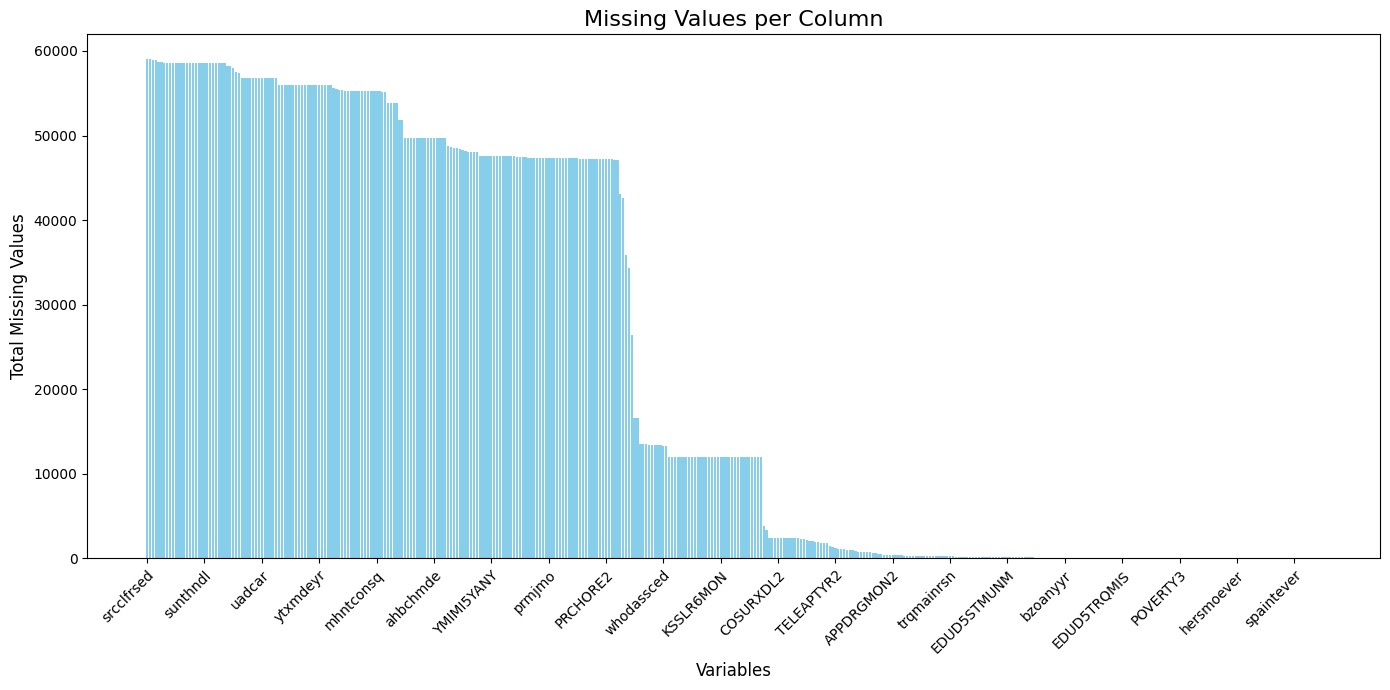

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate missing values and their percentages
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine results into a DataFrame
missing_data = pd.DataFrame({
    'Total Missing Values': missing_values,
    'Percentage of Missing Values': missing_percentage
})

# Filter out columns with no missing values
missing_data = missing_data[missing_data['Total Missing Values'] > 0]

# Sort the missing data for better visualization
missing_data = missing_data.sort_values(by='Total Missing Values', ascending=False)

# Plot a bar chart of missing values with cleaner x-axis
plt.figure(figsize=(14, 7))
bars = plt.bar(missing_data.index, missing_data['Total Missing Values'], color='skyblue')

# Rotate and format x-axis labels for better readability
step = max(1, len(missing_data) // 20)  # Display roughly 20 labels
plt.xticks(range(0, len(missing_data), step),
           missing_data.index[::step],
           rotation=45, ha='right', fontsize=10, wrap=True)

# Add a title and labels
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Total Missing Values', fontsize=12)
plt.title('Missing Values per Column', fontsize=16)

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the bar chart
plt.show()


In [ ]:
# for our models we need to have quantitaive variables for input and output so we have to convert the categorical to numerical by get_dummies.
# get_dummies converts categorical to numerical and here for legitimate skip we can impute the data
#recoding is used when we have categories in 90s that need to be recoded to yes/no or 1/2 like legitimate skip


# Keep_as_is are for the variables that are binary or numeric, convert_to_dummies are for variables with codes in 90s
# like 94=dont know, 99=legitimate skip or with a single code that does make not sense as its own category, and to_recode is ones with the garbage data at the end.
# variables not in either lists will not be included, basically non-relevant ones or redundant ones.

# ANALWT2_c is the calibrated and weighted variable, because some of the people category have larger weight due to having higher number of respondentds

# psychflag is the target variable
keep_as_is = ['ANALWT2_C', 'stmnmflag']
convert_to_dummies = ['PDEN10', 'COUTYP4', 'MAIIN102', 'AGE3', 'speakengl', 'irsex', 'irmarit', 'IREDUHIGHST2', 'NEWRACE2', 'HEALTH2', 'IRHHSIZ2', 'IRKI17_2',
                      'IRHH65_2', 'irfamsoc', 'irfamssi', 'irfstamp', 'irfampmt', 'irfamsvc', 'IRPINC3', 'IRFAMIN3', 'govtprog', 'POVERTY3', 'cigever', 'irpmnicdep', 'MEDMJPA2' ]
to_recode = ['MOVSINPYR2', 'sexident', 'service', 'eduschlgo', 'miltfamly', 'WRK35WKUS', 'wrkdrgpol', 'wrkdrgedu', 'wrkdrghlp', 'wrktstalc', 'wrktstdrg', 'wrktstrdm', 'irwrkstat', 'hltinalc', 'hltindrg', 'hltinmnt',
             'ANYHLTI2', 'cellwrkng', 'booked', 'mxmjpnlt', 'DRVINALCO2', 'DRVINMARJ2', 'drvindrg', 'drvindrotmj', 'drvinaldrg', 'parol', 'prob', 'cigmfu', 'cigrec', 'CIG30USE', 'CG30EST', 'CIG30AV', 'CIGMENTH30',
             'CIGROLL30', 'cigdlymo', 'cigage', 'cigdlyfu', 'cigdlmfu', 'CIG100LF', 'nicvapever', 'nicvapage', 'nicvapyfu', 'nicvapmfu', 'nicvaprec', 'NICVAP30N', 'smklssevr', 'smklsstry', 'smklssyfu', 'smklssmfu',
             'smklssrec', 'SMKLSS30N', 'SMKLSS30E', 'cigarevr', 'cigartry', 'cigaryfu', 'cigarmfu', 'cigarrec', 'CGR30USE', 'CI30EST', 'pipever', 'PIPE30DY', 'cigcragp', 'cigregdy', 'cigwake', 'ndssdepnd', 'ftnddepnd',
             'pmnicdep', 'alcever', 'alcyfu', 'alcrec', 'albstway', 'alcdays', 'AL30EST', 'ALCBNG30D', 'cadrpeop', 'CADROTS2', 'cabuyfre', 'cabundag', 'cafrewho', 'CAFRESP2', 'cadrkdrug', 'cabingevr', 'cabingyfu',
             'cabingmfu', 'uadpeop', 'uadpaid', 'cadrkmarj', 'cbdhmpevr', 'cbdhmprec', 'mjever', 'mjmfu', 'mjrec', 'mrbstway', 'MR30EST', 'mjyrsmoke', 'mjyrvape', 'mjyrdab', 'mjyreat', 'mjmonsmoke', 'mjanymedyr',
             'mkmbghtyr', 'MKMBGHT30N2', 'MKMAMTPDCOM2', 'mkmbghtdisp', 'MKMLOOGMCOM2', 'mkmsellmrj', 'cocever', 'cocrec', 'ccbstway', 'crkever', 'crakrec', 'crbstway', 'herever', 'herrec', 'hrbstway',
             'lsd', 'pcp', 'peyote', 'mesc', 'psilcy', 'ecstmolly', 'ketminesk', 'dmtamtfxy', 'salviadiv', 'hallucoth', 'hallucevr', 'hallucrec', 'lsdrec', 'pcprec', 'ecstmorec', 'ketminrec', 'damtfxrec', 'salviarec',
             'inhalever', 'inhalrec', 'inheaswy', 'methamevr', 'methamyfu', 'methamrec', 'metheaswy', 'oxcnanyyr', 'pnranylif', 'pnrnmlif', 'pnranyrec', 'oxcnnmyr', 'pnrnmrec', 'PNRNM30D', 'PNRNM30AL', 'pnrwynorx',
             'pnrwygamt', 'pnrwylngr', 'pnrwyotwy', 'pnrrspain', 'pnrrsrelx', 'pnrrsexpt', 'pnrrshigh', 'pnrrsslep', 'pnrrsemot', 'pnrrsdgfx', 'pnrrshook', 'pnrrssor', 'trqanylif', 'trqanyrec', 'trbzoanyyr', 'trqnmlif',
             'trqnmrec', 'TRQNM30D', 'trqwynorx', 'trqwygamt', 'trqwyoftn', 'trqrsrelx', 'trqrsexpt', 'trqrshigh', 'trqrsslep', 'trqrsemot', 'trqrsdgfx', 'trqrshook', 'trqrssor', 'trbzonmyr'

]

In [ ]:
total_variables = len(convert_to_dummies) + len(to_recode)
total_variables

204

In [ ]:
# for MOVSINPYR2 if we have 985,994,997,998 convert them to NaN by np.nan
# for service # 2 in the codebook means no (otherwise would use 0), isin([85,94,97,99]) means that we turn categories 85,94,97,99 into a 2 which means no, otherwise we leave them as is
# for sexident if 85,94,97,98,99 convert to 4 which is the 4th category non of the above
# for WRK35WKUS if 99 converrt to 9, if 98 make nan to be imputed
df['MOVSINPYR2'] = np.where(df['MOVSINPYR2'].isin([985,994,997,998]), np.nan, df['MOVSINPYR2'])
df['sexident'] = np.where(df['sexident'].isin([85,94,97,98,99]), 4, df['sexident'])
df['service'] = np.where(df['service'].isin([85,94,97,99]), 2, df['service'])
df['eduschlgo'] = np.where(df['eduschlgo'].isin([11,85,94,97,98]), np.nan, df['eduschlgo'])
df['miltfamly'] = np.where(df['miltfamly'].isin([85,94,97,98]), np.nan, df['miltfamly'])
df['WRK35WKUS'] = np.where(df['WRK35WKUS'].isin([99]), 9, df['WRK35WKUS'])
df['WRK35WKUS'] = np.where(df['WRK35WKUS'].isin([98]), np.nan, df['WRK35WKUS'])
df['wrkdrgpol'] = np.where(df['wrkdrgpol'].isin([85,94,97,98,99]), np.nan, df['wrkdrgpol'])
df['wrkdrgedu'] = np.where(df['wrkdrgedu'].isin([85,94,97,98,99]), np.nan, df['wrkdrgedu'])
df['wrkdrghlp'] = np.where(df['wrkdrghlp'].isin([85,94,97,98,99]), np.nan, df['wrkdrghlp'])
df['wrktstalc'] = np.where(df['wrktstalc'].isin([85,94,97,98,99]), np.nan, df['wrktstalc'])
df['wrktstdrg'] = np.where(df['wrktstdrg'].isin([85,94,97,98,99]), np.nan, df['wrktstdrg'])
df['wrktstrdm'] = np.where(df['wrktstrdm'].isin([85,94,97,98,99]), np.nan, df['wrktstrdm'])
df['irwrkstat'] = np.where(df['irwrkstat'].isin([85,94,97,98,99]), 4, df['irwrkstat'])
df['hltinalc'] = np.where(df['hltinalc'].isin([85,94,97,98,99]), np.nan, df['hltinalc'])
df['hltindrg'] = np.where(df['hltindrg'].isin([85,94,97,98,99]), np.nan, df['hltindrg'])
df['hltinmnt'] = np.where(df['hltinmnt'].isin([85,94,97,98,99]), np.nan, df['hltinmnt'])
df['ANYHLTI2'] = np.where(df['ANYHLTI2'].isin([94,97,99]), np.nan, df['ANYHLTI2'])
df['cellwrkng'] = np.where(df['cellwrkng'].isin([85,94,97,98]), np.nan, df['cellwrkng'])
df['booked'] = np.where(df['booked'].isin([85,94,97,98]), np.nan, df['booked'])
df['mxmjpnlt'] = np.where(df['mxmjpnlt'].isin([85,94,97,98]), np.nan, df['mxmjpnlt'])
df['DRVINALCO2'] = np.where(df['DRVINALCO2'] == '.', np.nan, df['DRVINALCO2'])
df['DRVINMARJ2'] = np.where(df['DRVINMARJ2'] == '.', np.nan, df['DRVINMARJ2'])
df['drvindrg'] = np.where(df['drvindrg'] == '.', np.nan, df['drvindrg'])
df['drvindrotmj'] = np.where(df['drvindrotmj'] == '.', np.nan, df['drvindrotmj'])
df['drvinaldrg'] = np.where(df['drvinaldrg'] == '.', np.nan, df['drvinaldrg'])
df['parol'] = np.where(df['parol'] == '.', np.nan, df['parol'])
df['prob'] = np.where(df['prob'] == '.', np.nan, df['prob'])
df['cigmfu'] = np.where(df['cigmfu'].isin([85, 89, 94, 97, 98, 99]), np.nan, df['cigmfu'])
df['cigrec'] = np.where(df['cigrec'].isin([8, 9, 11, 14, 19, 29, 39, 91]), np.nan, df['cigrec'])
df['CIG30USE'] = np.where(df['CIG30USE'].isin([91, 93, 94, 97, 98]), np.nan, df['CIG30USE'])
df['CG30EST'] = np.where(df['CG30EST'].isin([91, 93, 94, 97, 98, 99]), np.nan, df['CG30EST'])
df['CIG30AV'] = np.where(df['CIG30AV'].isin([91, 93, 94, 97, 98]), np.nan, df['CIG30AV'])
df['CIGMENTH30'] = np.where(df['CIGMENTH30'].isin([91, 93, 94, 97, 98]), np.nan, df['CIGMENTH30'])
df['CIGROLL30'] = np.where(df['CIGROLL30'].isin([91, 93, 94, 97, 98]), np.nan, df['CIGROLL30'])
df['cigdlymo'] = np.where(df['cigdlymo'].isin([5, 91, 94, 97]), np.nan, df['cigdlymo'])
df['cigage'] = np.where(df['cigage'].isin([985, 991, 994, 997, 998, 999]), np.nan, df['cigage'])
df['cigdlyfu'] = np.where(df['cigdlyfu'].isin([9985, 9989, 9991, 9994, 9997, 9998, 9999]), np.nan, df['cigdlyfu'])
df['cigdlmfu'] = np.where(df['cigdlmfu'].isin([85, 89, 91, 94, 97, 98, 99]), np.nan, df['cigdlmfu'])
df['CIG100LF'] = np.where(df['CIG100LF'].isin([3, 5, 91, 94, 97]), np.nan, df['CIG100LF'])
df['nicvapever'] = np.where(df['nicvapever'].isin([94, 97]), np.nan, df['nicvapever'])
df['nicvapage'] = np.where(df['nicvapage'].isin([985, 991, 994, 997, 998]), np.nan, df['nicvapage'])
df['nicvapyfu'] = np.where(df['nicvapyfu'].isin([9985, 9989, 9991, 9994, 9997, 9998, 9999]), np.nan, df['nicvapyfu'])
df['nicvapmfu'] = np.where(df['nicvapmfu'].isin([85, 89, 91, 94, 97, 98, 99]), np.nan, df['nicvapmfu'])
df['nicvaprec'] = np.where(df['nicvaprec'].isin([9, 11, 14, 19, 29, 39, 91, 98]), np.nan, df['nicvaprec'])
df['NICVAP30N'] = np.where(df['NICVAP30N'].isin([91, 93, 94, 97, 98]), np.nan, df['NICVAP30N'])
df['smklssevr'] = np.where(df['smklssevr'].isin([94, 97]), np.nan, df['smklssevr'])
df['smklsstry'] = np.where(df['smklsstry'].isin([985, 991, 994, 997, 998]), np.nan, df['smklsstry'])
df['smklssyfu'] = np.where(df['smklssyfu'].isin([9985, 9989, 9991, 9994, 9997, 9998, 9999]), np.nan, df['smklssyfu'])
df['smklssmfu'] = np.where(df['smklssmfu'].isin([85, 89, 91, 94, 97, 98, 99]), np.nan, df['smklssmfu'])
df['smklssrec'] = np.where(df['smklssrec'].isin([9, 14, 19, 29, 39, 91, 97, 98]), np.nan, df['smklssrec'])
df['SMKLSS30N'] = np.where(df['SMKLSS30N'].isin([91, 93, 94, 97, 98]), np.nan, df['SMKLSS30N'])
df['SMKLSS30E'] = np.where(df['SMKLSS30E'].isin([91, 93, 94, 97, 98, 99]), np.nan, df['SMKLSS30E'])
df['cigarevr'] = np.where(df['cigarevr'].isin([94]), np.nan, df['cigarevr'])
df['cigartry'] = np.where(df['cigartry'].isin([985, 991, 994, 997, 998]), np.nan, df['cigartry'])
df['cigaryfu'] = np.where(df['cigaryfu'].isin([9985, 9989, 9991, 9994, 9997, 9998, 9999]), np.nan, df['cigaryfu'])
df['cigarmfu'] = np.where(df['cigarmfu'].isin([85, 89, 91, 94, 97, 98, 99]), np.nan, df['cigarmfu'])
df['cigarrec'] = np.where(df['cigarrec'].isin([8, 9, 11, 14, 19, 29, 91, 98]), np.nan, df['cigarrec'])
df['CGR30USE'] = np.where(df['CGR30USE'].isin([91, 93, 94, 97, 98]), np.nan, df['CGR30USE'])
df['CI30EST'] = np.where(df['CI30EST'].isin([91, 93, 94, 98, 99]), np.nan, df['CI30EST'])
df['pipever'] = np.where(df['pipever'].isin([94]), np.nan, df['pipever'])
df['PIPE30DY'] = np.where(df['PIPE30DY'].isin([91, 94, 98]), np.nan, df['PIPE30DY'])
df['cigcragp'] = np.where(df['cigcragp'].isin([85, 91, 93, 94, 97, 98]), np.nan, df['cigcragp'])
df['cigregdy'] = np.where(df['cigregdy'].isin([85, 91, 93, 94, 97, 98]), np.nan, df['cigregdy'])
df['cigwake'] = np.where(df['cigwake'].isin([85, 91, 93, 94, 97, 98]), np.nan, df['cigwake'])
df['ndssdepnd'] = np.where(df['ndssdepnd'] == '.', np.nan, df['ndssdepnd'])
df['ftnddepnd'] = np.where(df['ftnddepnd'] == '.', np.nan, df['ftnddepnd'])
df['pmnicdep'] = np.where(df['pmnicdep'] == '.', np.nan, df['pmnicdep'])
df['alcever'] = np.where(df['alcever'].isin([85, 94, 97, 98]), np.nan, df['alcever'])
df['alcyfu'] = np.where(df['alcyfu'].isin([9985, 9989, 9991, 9994, 9997, 9998, 9999]), np.nan, df['alcyfu'])
df['alcrec'] = np.where(df['alcrec'].isin([85, 91, 93, 97, 98]), np.nan, df['alcrec'])
df['albstway'] = np.where(df['albstway'].isin([85, 91, 93, 94, 97, 98]), np.nan, df['albstway'])
df['alcdays'] = np.where(df['alcdays'].isin([85, 91, 93, 97, 98]), np.nan, df['alcdays'])
df['AL30EST'] = np.where(df['AL30EST'].isin([91, 93, 94, 97, 98]), np.nan, df['AL30EST'])
df['ALCBNG30D'] = np.where(df['ALCBNG30D'].isin([91, 93, 94, 97, 98]), np.nan, df['ALCBNG30D'])
df['cadrpeop'] = np.where(df['cadrpeop'].isin([85, 94, 97, 98, 99]), np.nan, df['cadrpeop'])
df['CADROTS2'] = np.where(df['CADROTS2'].isin([85, 94, 97, 98, 99]), np.nan, df['CADROTS2'])
df['cabuyfre'] = np.where(df['cabuyfre'].isin([85, 94, 97, 98, 99]), np.nan, df['cabuyfre'])
df['cabundag'] = np.where(df['cabundag'].isin([85, 94, 97, 98, 99]), np.nan, df['cabundag'])
df['cafrewho'] = np.where(df['cafrewho'].isin([85, 94, 97, 98, 99]), np.nan, df['cafrewho'])
df['CAFRESP2'] = np.where(df['CAFRESP2'].isin([85, 94, 97, 98, 99]), np.nan, df['CAFRESP2'])
df['cadrkdrug'] = np.where(df['cadrkdrug'].isin([85, 94, 97, 98, 99]), np.nan, df['cadrkdrug'])
df['cabingevr'] = np.where(df['cabingevr'].isin([85, 94, 97, 98, 99]), np.nan, df['cabingevr'])
df['cabingyfu'] = np.where(df['cabingyfu'].isin([85, 94, 97, 98, 99]), np.nan, df['cabingyfu'])
df['cabingmfu'] = np.where(df['cabingmfu'].isin([85, 94, 97, 98, 99]), np.nan, df['cabingmfu'])
df['uadpeop'] = np.where(df['uadpeop'].isin([85, 94, 97, 98, 99]), np.nan, df['uadpeop'])
df['uadpaid'] = np.where(df['uadpaid'].isin([85, 94, 97, 98, 99]), np.nan, df['uadpaid'])
df['cadrkmarj'] = np.where(df['cadrkmarj'].isin([85, 94, 97, 98, 99]), np.nan, df['cadrkmarj'])
df['cbdhmpevr'] = np.where(df['cbdhmpevr'].isin([94, 97]), np.nan, df['cbdhmpevr'])
df['cbdhmprec'] = np.where(df['cbdhmprec'].isin([91, 98]), np.nan, df['cbdhmprec'])
df['mjever'] = np.where(df['mjever'].isin([94, 97]), np.nan, df['mjever'])
df['mjmfu'] = np.where(df['mjmfu'].isin([85, 89, 91, 94, 97, 98]), np.nan, df['mjmfu'])
df['mjrec'] = np.where(df['mjrec'].isin([91, 98]), np.nan, df['mjrec'])
df['mrbstway'] = np.where(df['mrbstway'].isin([85, 89, 91, 94, 97, 98]), np.nan, df['mrbstway'])
df['MR30EST'] = np.where(df['MR30EST'].isin([91, 93, 94, 97, 98]), np.nan, df['MR30EST'])
df['mjyrsmoke'] = np.where(df['mjyrsmoke'].isin([91, 93, 94, 97, 98]), np.nan, df['mjyrsmoke'])
df['mjyrvape'] = np.where(df['mjyrvape'].isin([91, 93, 94, 97, 98]), np.nan, df['mjyrvape'])
df['mjyrdab'] = np.where(df['mjyrdab'].isin([91, 93, 94, 97, 98]), np.nan, df['mjyrdab'])
df['mjyreat'] = np.where(df['mjyreat'].isin([91, 93, 94, 97, 98]), np.nan, df['mjyreat'])
df['mjmonsmoke'] = np.where(df['mjmonsmoke'].isin([91, 93, 94, 97, 98]), np.nan, df['mjmonsmoke'])
df['mjanymedyr'] = np.where(df['mjanymedyr'].isin([91, 93, 94, 97, 98]), np.nan, df['mjanymedyr'])
df['mkmbghtyr'] = np.where(df['mkmbghtyr'].isin([91, 93, 94, 97, 98]), np.nan, df['mkmbghtyr'])
df['MKMBGHT30N2'] = np.where(df['MKMBGHT30N2'].isin([91, 93, 94, 97, 98]), np.nan, df['MKMBGHT30N2'])
df['MKMAMTPDCOM2'] = np.where(df['MKMAMTPDCOM2'].isin([91, 93, 94, 97, 98]), np.nan, df['MKMAMTPDCOM2'])
df['mkmbghtdisp'] = np.where(df['mkmbghtdisp'].isin([91, 93, 94, 97, 98]), np.nan, df['mkmbghtdisp'])
df['MKMLOOGMCOM2'] = np.where(df['MKMLOOGMCOM2'].isin([91, 93, 94, 97, 98]), np.nan, df['MKMLOOGMCOM2'])
df['mkmsellmrj'] = np.where(df['mkmsellmrj'].isin([91, 93, 94, 97, 98]), np.nan, df['mkmsellmrj'])
df['cocever'] = np.where(df['cocever'].isin([94, 97]), np.nan, df['cocever'])
df['cocrec'] = np.where(df['cocrec'].isin([91, 97, 98]), np.nan, df['cocrec'])
df['ccbstway'] = np.where(df['ccbstway'].isin([85, 94, 97, 98]), np.nan, df['ccbstway'])
df['crkever'] = np.where(df['crkever'].isin([94, 97]), np.nan, df['crkever'])
df['crakrec'] = np.where(df['crakrec'].isin([91, 97, 98]), np.nan, df['crakrec'])
df['crbstway'] = np.where(df['crbstway'].isin([85, 94, 97, 98]), np.nan, df['crbstway'])
df['herever'] = np.where(df['herever'].isin([85, 94, 97]), np.nan, df['herever'])
df['herrec'] = np.where(df['herrec'].isin([85, 94, 97, 98]), np.nan, df['herrec'])
df['hrbstway'] = np.where(df['hrbstway'].isin([85, 91, 97, 98]), np.nan, df['hrbstway'])
df['lsd'] = np.where(df['lsd'].isin([85, 94, 97]), np.nan, df['lsd'])
df['pcp'] = np.where(df['pcp'].isin([85, 94, 97]), np.nan, df['pcp'])
df['peyote'] = np.where(df['peyote'].isin([85, 94, 97]), np.nan, df['peyote'])
df['mesc'] = np.where(df['mesc'].isin([85, 94, 97]), np.nan, df['mesc'])
df['psilcy'] = np.where(df['psilcy'].isin([85, 94, 97]), np.nan, df['psilcy'])
df['ecstmolly'] = np.where(df['ecstmolly'].isin([85, 94, 97]), np.nan, df['ecstmolly'])
df['ketminesk'] = np.where(df['ketminesk'].isin([85, 94, 97]), np.nan, df['ketminesk'])
df['dmtamtfxy'] = np.where(df['dmtamtfxy'].isin([85, 94, 97]), np.nan, df['dmtamtfxy'])
df['salviadiv'] = np.where(df['salviadiv'].isin([85, 94, 97]), np.nan, df['salviadiv'])
df['hallucoth'] = np.where(df['hallucoth'].isin([85, 94, 97]), np.nan, df['hallucoth'])
df['hallucevr'] = np.where(df['hallucevr'].isin([85, 94, 97]), np.nan, df['hallucevr'])
df['hallucrec'] = np.where(df['hallucrec'].isin([85, 94, 97]), np.nan, df['hallucrec'])
df['lsdrec'] = np.where(df['lsdrec'].isin([85, 94, 97]), np.nan, df['lsdrec'])
df['pcprec'] = np.where(df['pcprec'].isin([85, 94, 97]), np.nan, df['pcprec'])
df['ecstmorec'] = np.where(df['ecstmorec'].isin([85, 94, 97]), np.nan, df['ecstmorec'])
df['ketminrec'] = np.where(df['ketminrec'].isin([85, 94, 97]), np.nan, df['ketminrec'])
df['damtfxrec'] = np.where(df['damtfxrec'].isin([85, 94, 97]), np.nan, df['damtfxrec'])
df['salviarec'] = np.where(df['salviarec'].isin([85, 94, 97]), np.nan, df['salviarec'])
df['inhalever'] = np.where(df['inhalever'].isin([85, 94, 97, 98]), np.nan, df['inhalever'])
df['inhalrec'] = np.where(df['inhalrec'].isin([85, 94, 97, 98]), np.nan, df['inhalrec'])
df['inheaswy'] = np.where(df['inheaswy'].isin([85, 94, 97, 98]), np.nan, df['inheaswy'])
df['methamevr'] = np.where(df['methamevr'].isin([85, 94, 97, 98]), np.nan, df['methamevr'])
df['methamyfu'] = np.where(df['methamyfu'].isin([9985, 9989, 9991, 9994, 9997, 9998, 9999]), np.nan, df['methamyfu'])
df['methamrec'] = np.where(df['methamrec'].isin([85, 94, 97, 98]), np.nan, df['methamrec'])
df['metheaswy'] = np.where(df['metheaswy'].isin([85, 94, 97, 98]), np.nan, df['metheaswy'])
df['oxcnanyyr'] = np.where(df['oxcnanyyr'].isin([85, 94, 97, 98]), np.nan, df['oxcnanyyr'])
df['pnranylif'] = np.where(df['pnranylif'].isin([85, 94, 97, 98]), np.nan, df['pnranylif'])
df['pnrnmlif'] = np.where(df['pnrnmlif'].isin([85, 94, 97, 98]), np.nan, df['pnrnmlif'])
df['pnranyrec'] = np.where(df['pnranyrec'].isin([85, 94, 97, 98]), np.nan, df['pnranyrec'])
df['oxcnnmyr'] = np.where(df['oxcnnmyr'].isin([85, 94, 97, 98]), np.nan, df['oxcnnmyr'])
df['pnrnmrec'] = np.where(df['pnrnmrec'].isin([85, 94, 97, 98]), np.nan, df['pnrnmrec'])
df['PNRNM30D'] = np.where(df['PNRNM30D'].isin([85, 94, 97, 98]), np.nan, df['PNRNM30D'])
df['PNRNM30AL'] = np.where(df['PNRNM30AL'].isin([85, 94, 97, 98]), np.nan, df['PNRNM30AL'])
df['pnrwynorx'] = np.where(df['pnrwynorx'].isin([85, 94, 97, 98]), np.nan, df['pnrwynorx'])
df['pnrwygamt'] = np.where(df['pnrwygamt'].isin([85, 94, 97, 98]), np.nan, df['pnrwygamt'])
df['pnrwylngr'] = np.where(df['pnrwylngr'].isin([85, 94, 97, 98]), np.nan, df['pnrwylngr'])
df['pnrwyotwy'] = np.where(df['pnrwyotwy'].isin([85, 94, 97, 98]), np.nan, df['pnrwyotwy'])
df['pnrrspain'] = np.where(df['pnrrspain'].isin([85, 94, 97, 98]), np.nan, df['pnrrspain'])
df['pnrrsrelx'] = np.where(df['pnrrsrelx'].isin([85, 94, 97, 98]), np.nan, df['pnrrsrelx'])
df['pnrrsexpt'] = np.where(df['pnrrsexpt'].isin([85, 94, 97, 98]), np.nan, df['pnrrsexpt'])
df['pnrrshigh'] = np.where(df['pnrrshigh'].isin([85, 94, 97, 98]), np.nan, df['pnrrshigh'])
df['pnrrsslep'] = np.where(df['pnrrsslep'].isin([85, 94, 97, 98]), np.nan, df['pnrrsslep'])
df['pnrrsemot'] = np.where(df['pnrrsemot'].isin([85, 94, 97, 98]), np.nan, df['pnrrsemot'])
df['pnrrsdgfx'] = np.where(df['pnrrsdgfx'].isin([85, 94, 97, 98]), np.nan, df['pnrrsdgfx'])
df['pnrrshook'] = np.where(df['pnrrshook'].isin([85, 94, 97, 98]), np.nan, df['pnrrshook'])
df['pnrrssor'] = np.where(df['pnrrssor'].isin([85, 94, 97, 98]), np.nan, df['pnrrssor'])
df['trqanylif'] = np.where(df['trqanylif'].isin([85, 94, 97, 98]), np.nan, df['trqanylif'])
df['trqanyrec'] = np.where(df['trqanyrec'].isin([85, 94, 97, 98]), np.nan, df['trqanyrec'])
df['trbzoanyyr'] = np.where(df['trbzoanyyr'].isin([85, 94, 97, 98]), np.nan, df['trbzoanyyr'])
df['trqnmlif'] = np.where(df['trqnmlif'].isin([85, 94, 97, 98]), np.nan, df['trqnmlif'])
df['trqnmrec'] = np.where(df['trqnmrec'].isin([85, 94, 97, 98]), np.nan, df['trqnmrec'])
df['TRQNM30D'] = np.where(df['TRQNM30D'].isin([85, 94, 97, 98]), np.nan, df['TRQNM30D'])
df['trqwynorx'] = np.where(df['trqwynorx'].isin([85, 94, 97, 98]), np.nan, df['trqwynorx'])
df['trqwygamt'] = np.where(df['trqwygamt'].isin([85, 94, 97, 98]), np.nan, df['trqwygamt'])
df['trqwyoftn'] = np.where(df['trqwyoftn'].isin([85, 94, 97, 98]), np.nan, df['trqwyoftn'])
df['trqrsrelx'] = np.where(df['trqrsrelx'].isin([85, 94, 97, 98]), np.nan, df['trqrsrelx'])
df['trqrsexpt'] = np.where(df['trqrsexpt'].isin([85, 94, 97, 98]), np.nan, df['trqrsexpt'])
df['trqrshigh'] = np.where(df['trqrshigh'].isin([85, 94, 97, 98]), np.nan, df['trqrshigh'])
df['trqrsslep'] = np.where(df['trqrsslep'].isin([85, 94, 97, 98]), np.nan, df['trqrsslep'])
df['trqrsemot'] = np.where(df['trqrsemot'].isin([85, 94, 97, 98]), np.nan, df['trqrsemot'])
df['trqrsdgfx'] = np.where(df['trqrsdgfx'].isin([85, 94, 97, 98]), np.nan, df['trqrsdgfx'])
df['trqrshook'] = np.where(df['trqrshook'].isin([85, 94, 97, 98]), np.nan, df['trqrshook'])
df['trqrssor'] = np.where(df['trqrssor'].isin([85, 94, 97, 98]), np.nan, df['trqrssor'])
df['trbzonmyr'] = np.where(df['trbzonmyr'].isin([85, 94, 97, 98]), np.nan, df['trbzonmyr'])

In [ ]:
# code below is get_dummies for categorical variables
dummies1 = pd.get_dummies(df[convert_to_dummies].astype(str), drop_first=True)
dummies2 = pd.get_dummies(df[to_recode].astype(str), drop_first=True)
df_selected = pd.concat([df[keep_as_is], dummies1, dummies2], axis=1)
df_selected.head()

# code below is for get_dummies for the numeric variables
# df = pd.concat([df[keep_as_is], pd.get_dummies(df[convert_to_dummies], drop_first=True), pd.get_dummies(df[to_recode], drop_first=True)], axis=1)
# convert_to_dummies, get_dummies() which will return dummy-coded data. Here we use parameter drop_first = True, this will drop the first dummy variable,
# thus it will give n-1 dummies out of n discrete categorical levels by removing the first level. We have to drop one to prevent colinearity and we tend to drop the
# frist one, however it does not matter which one we drop.
# df_dummies = pd.get_dummies(df, columns=convert_to_dummies, drop_first=True)
# df_dummies.iloc[:,-18:].head()
# we want to look at the last 18 columns

,ANALWT2_C,stmnmflag,PDEN10_2,PDEN10_3,COUTYP4_2,COUTYP4_3,MAIIN102_2,AGE3_10,AGE3_11,AGE3_2,...,trqrshook_2.0,trqrshook_91.0,trqrshook_93.0,trqrshook_nan,trqrssor_2.0,trqrssor_91.0,trqrssor_93.0,trqrssor_nan,trbzonmyr_1.0,trbzonmyr_nan
0,298.004021,0,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,2292.377696,0,True,False,True,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2,216.604339,0,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,13828.218374,0,True,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
4,6282.612060,0,True,False,True,False,True,True,False,False,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
df_selected.shape

(59069, 1350)

In [ ]:
df_selected.head()

,ANALWT2_C,stmnmflag,PDEN10_2,PDEN10_3,COUTYP4_2,COUTYP4_3,MAIIN102_2,AGE3_10,AGE3_11,AGE3_2,...,trqrshook_2.0,trqrshook_91.0,trqrshook_93.0,trqrshook_nan,trqrssor_2.0,trqrssor_91.0,trqrssor_93.0,trqrssor_nan,trbzonmyr_1.0,trbzonmyr_nan
0,298.004021,0,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,2292.377696,0,True,False,True,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2,216.604339,0,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,13828.218374,0,True,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
4,6282.612060,0,True,False,True,False,True,True,False,False,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
df_selected.isna().any()

,0
ANALWT2_C,False
stmnmflag,False
PDEN10_2,False
PDEN10_3,False
COUTYP4_2,False
...,...
trqrssor_91.0,False
trqrssor_93.0,False
trqrssor_nan,False
trbzonmyr_1.0,False


In [ ]:
# Check for NaN values in df_selected
total_nan = df_selected.isnull().sum().sum()

# Print the result
print(f"The total number of NaN values in df_selected is: {total_nan}")


The total number of NaN values in df_selected is: 0


<Axes: >

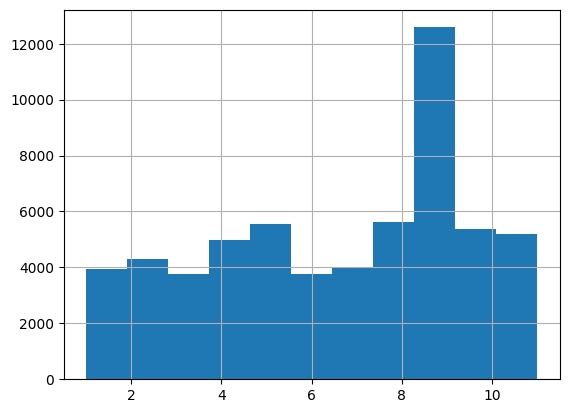

In [ ]:
# Mostly Respondent is between 35 and 49 years oldwhich is category 9 of the survey question age

df['AGE3'].hist(bins=11)

In [ ]:
# stmnmflag (ever misused stimulants) is the target variable
y = df_selected['stmnmflag']

In [ ]:
# one square bracket for one column, two square brackets for more than one column
X = df_selected.drop(columns=['stmnmflag'])

In [ ]:
# The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# Train/test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)

In [ ]:
# Check the number of features
num_features = X.shape[1]
print(f"Number of features in the dataset: {num_features}")

# Create a list of feature names
feature_names = X.columns
print(f"Feature names: {feature_names}")

Number of features in the dataset: 1349
Feature names: Index(['ANALWT2_C', 'PDEN10_2', 'PDEN10_3', 'COUTYP4_2', 'COUTYP4_3',
       'MAIIN102_2', 'AGE3_10', 'AGE3_11', 'AGE3_2', 'AGE3_3',
       ...
       'trqrshook_2.0', 'trqrshook_91.0', 'trqrshook_93.0', 'trqrshook_nan',
       'trqrssor_2.0', 'trqrssor_91.0', 'trqrssor_93.0', 'trqrssor_nan',
       'trbzonmyr_1.0', 'trbzonmyr_nan'],
      dtype='object', length=1349)


In [ ]:
# Performing GridSearch to find the best hyperparameters for the Random Forest Classifier
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    "n_estimators": [200],
    "max_depth": [8, 12, 16],
    "min_samples_split": [3, 5]
}

# Initialize GridSearchCV with RandomForestRegressor and the defined parameter grid
rf_cv = GridSearchCV(rf_model, param_grid=param_grid, verbose=3, cv=3, n_jobs=-1, scoring='r2')

# Fit GridSearchCV to the training data
rf_cv.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", rf_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 16, 'min_samples_split': 3, 'n_estimators': 200}


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

# Initializing the model
rf_model = RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=200, random_state=1)

# Define cross-validation folds
folds = [3, 5, 10]

# Define custom scorers
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')

# Function to compute classification metrics
def compute_metrics(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Function to perform cross-validation and compute mean and std for classification metrics
def cross_validate_and_compute_stats(model, X, y, folds):
    results = {}
    for fold in folds:
        kf = KFold(n_splits=fold, shuffle=True, random_state=1)

        accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring=accuracy_scorer)
        precision_scores = cross_val_score(model, X, y, cv=kf, scoring=precision_scorer)
        recall_scores = cross_val_score(model, X, y, cv=kf, scoring=recall_scorer)
        f1_scores = cross_val_score(model, X, y, cv=kf, scoring=f1_scorer)

        accuracy_mean, accuracy_std = np.mean(accuracy_scores), np.std(accuracy_scores)
        precision_mean, precision_std = np.mean(precision_scores), np.std(precision_scores)
        recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
        f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

        results[fold] = {
            'accuracy': {'mean': accuracy_mean, 'std': accuracy_std},
            'precision': {'mean': precision_mean, 'std': precision_std},
            'recall': {'mean': recall_mean, 'std': recall_std},
            'f1': {'mean': f1_mean, 'std': f1_std}
        }

        print(f"{fold}-fold CV -> Accuracy: Mean = {accuracy_mean:.4f}, Std = {accuracy_std:.4f} | "
              f"Precision: Mean = {precision_mean:.4f}, Std = {precision_std:.4f} | "
              f"Recall: Mean = {recall_mean:.4f}, Std = {recall_std:.4f} | "
              f"F1: Mean = {f1_mean:.4f}, Std = {f1_std:.4f}")

    return results

# Fit the model on the training set
rf_model.fit(X_train, y_train)

# Compute metrics on the test set
initial_accuracy, initial_precision, initial_recall, initial_f1 = compute_metrics(rf_model, X_test, y_test)
print(f"Test Set -> Accuracy: {initial_accuracy:.4f}, Precision: {initial_precision:.4f}, "
      f"Recall: {initial_recall:.4f}, F1: {initial_f1:.4f}")

# Perform cross-validation and print results
results = cross_validate_and_compute_stats(rf_model, X_train, y_train, folds)

# Print out precision results
for fold in folds:
    print(f"{fold}-fold CV -> Precision: Mean = {results[fold]['precision']['mean']:.4f}, Std = {results[fold]['precision']['std']:.4f}")



Test Set -> Accuracy: 0.9571, Precision: 0.9485, Recall: 0.9571, F1: 0.9487
3-fold CV -> Accuracy: Mean = 0.9591, Std = 0.0013 | Precision: Mean = 0.9508, Std = 0.0022 | Recall: Mean = 0.9591, Std = 0.0013 | F1: Mean = 0.9511, Std = 0.0010
5-fold CV -> Accuracy: Mean = 0.9592, Std = 0.0019 | Precision: Mean = 0.9508, Std = 0.0027 | Recall: Mean = 0.9592, Std = 0.0019 | F1: Mean = 0.9513, Std = 0.0023
10-fold CV -> Accuracy: Mean = 0.9592, Std = 0.0024 | Precision: Mean = 0.9510, Std = 0.0038 | Recall: Mean = 0.9592, Std = 0.0024 | F1: Mean = 0.9515, Std = 0.0030
3-fold CV -> Precision: Mean = 0.9508, Std = 0.0022
5-fold CV -> Precision: Mean = 0.9508, Std = 0.0027
10-fold CV -> Precision: Mean = 0.9510, Std = 0.0038


In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = X.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
feature_importances = forest.feature_importances_
# Create a DataFrame to display feature importances
fi = pd.DataFrame({'variable': feature_names, 'feature_importance': feature_importances})

# Sort the DataFrame by feature importance
fi = fi.sort_values(by='feature_importance', ascending=False).reset_index(drop=True)

print(fi)

            variable  feature_importance
0          ANALWT2_C            0.016523
1     trqrsslep_91.0            0.008714
2     trqwygamt_91.0            0.008573
3     trqrsdgfx_91.0            0.008515
4     salviadiv_91.0            0.007378
...              ...                 ...
1344   nicvapage_6.0            0.000000
1345  nicvapage_63.0            0.000000
1346  nicvapage_64.0            0.000000
1347  nicvapage_67.0            0.000000
1348  nicvapage_68.0            0.000000

[1349 rows x 2 columns]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming X_train is your training set
feature_names = X_train.columns  # Ensure feature names are derived from X_train

# Fit the RandomForest model
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

# Extract feature importances
feature_importances = forest.feature_importances_

# Check if the lengths match
if len(feature_names) != len(feature_importances):
    print(f"Mismatch: {len(feature_names)} feature names, {len(feature_importances)} importances")
    raise ValueError("Mismatch between the number of features and feature importances.")

# Create a DataFrame to display feature importances
fi = pd.DataFrame({'variable': feature_names, 'feature_importance': feature_importances})

# Sort the DataFrame by feature importance
fi = fi.sort_values(by='feature_importance', ascending=False).reset_index(drop=True)


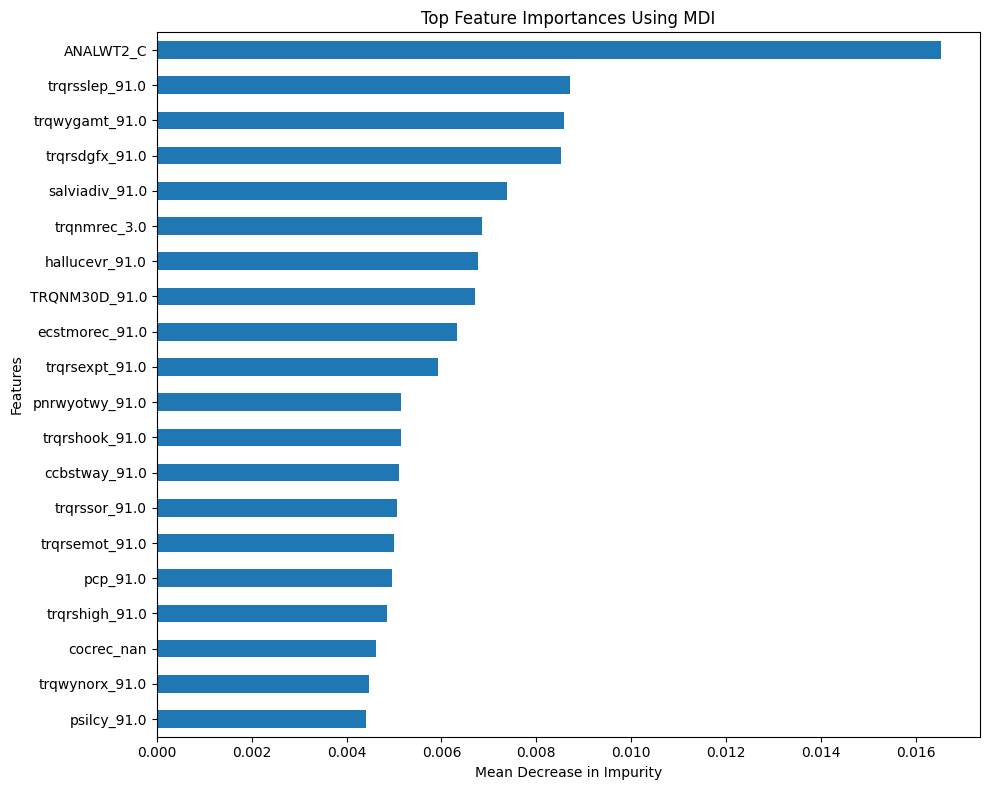

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming feature_importances and feature_names are already defined
forest_importances = pd.Series(feature_importances, index=feature_names)

# Step 1: Sort the feature importances
sorted_importances = forest_importances.sort_values(ascending=False)

# Step 2: Limit the number of features to display (e.g., top 20)
top_n = 20  # Adjust this number based on how many features you want to display
top_importances = sorted_importances.head(top_n)

# Step 3: Create a horizontal bar plot for better readability
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size as needed
top_importances.plot.barh(ax=ax)

# Step 4: Customize the plot
ax.set_title("Top Feature Importances Using MDI")
ax.set_xlabel("Mean Decrease in Impurity")
ax.set_ylabel("Features")
ax.invert_yaxis()  # Highest importance at the top
fig.tight_layout()

plt.show()

In [ ]:
# Plotting feature importance after droping the weight variable

from sklearn.ensemble import RandomForestClassifier
import pandas as pd


# Drop the 'ANALWT2_C' column from X_train
X_train = X_train.drop(columns=['ANALWT2_C'])

# Update feature_names after dropping 'lala'
feature_names = X_train.columns

# Fit the RandomForest model
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

# Extract feature importances
feature_importances = forest.feature_importances_

# Check if the lengths match
if len(feature_names) != len(feature_importances):
    print(f"Mismatch: {len(feature_names)} feature names, {len(feature_importances)} importances")
    raise ValueError("Mismatch between the number of features and feature importances.")

# Create a DataFrame to display feature importances
fi = pd.DataFrame({'variable': feature_names, 'feature_importance': feature_importances})

# Sort the DataFrame by feature importance
fi = fi.sort_values(by='feature_importance', ascending=False).reset_index(drop=True)

print(fi)


            variable  feature_importance
0     trqrshook_91.0            0.007880
1     hallucevr_91.0            0.007817
2      TRQNM30D_91.0            0.007798
3          mesc_91.0            0.007530
4     pnrrsdgfx_91.0            0.006991
...              ...                 ...
1343   CAFRESP2_16.0            0.000000
1344   cigartry_64.0            0.000000
1345   cigartry_63.0            0.000000
1346   cigartry_62.0            0.000000
1347     CI30EST_2.0            0.000000

[1348 rows x 2 columns]


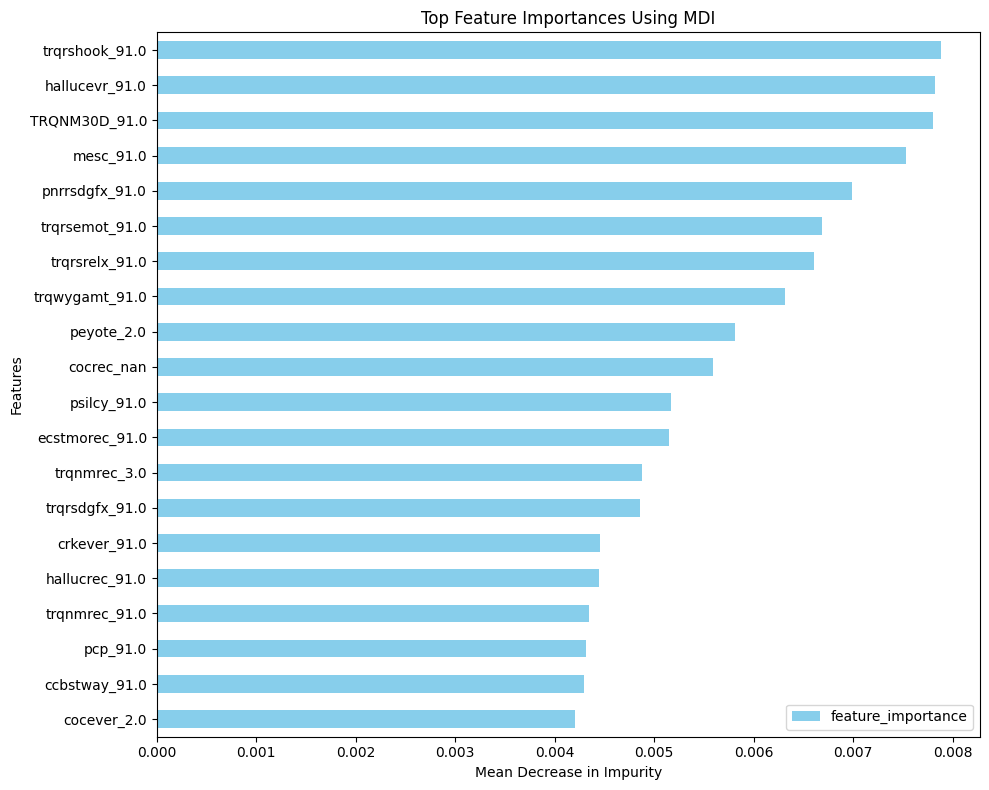

In [ ]:
# Plotting feature importance after droping the weight variable

import matplotlib.pyplot as plt

# Assuming the feature importances have been calculated and stored in the 'fi' DataFrame

# Step 1: Sort the feature importances (already done in your previous code)
# fi = fi.sort_values(by='feature_importance', ascending=False).reset_index(drop=True)

# Step 2: Limit the number of features to display (e.g., top 20)
top_n = 20  # Adjust this number based on how many features you want to display
top_importances = fi.head(top_n)

# Step 3: Create a horizontal bar plot for better readability
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size as needed
top_importances.plot.barh(x='variable', y='feature_importance', ax=ax, color='skyblue')

# Step 4: Customize the plot
ax.set_title("Top Feature Importances Using MDI")
ax.set_xlabel("Mean Decrease in Impurity")
ax.set_ylabel("Features")
ax.invert_yaxis()  # Highest importance at the top
fig.tight_layout()

# Show the plot
plt.show()


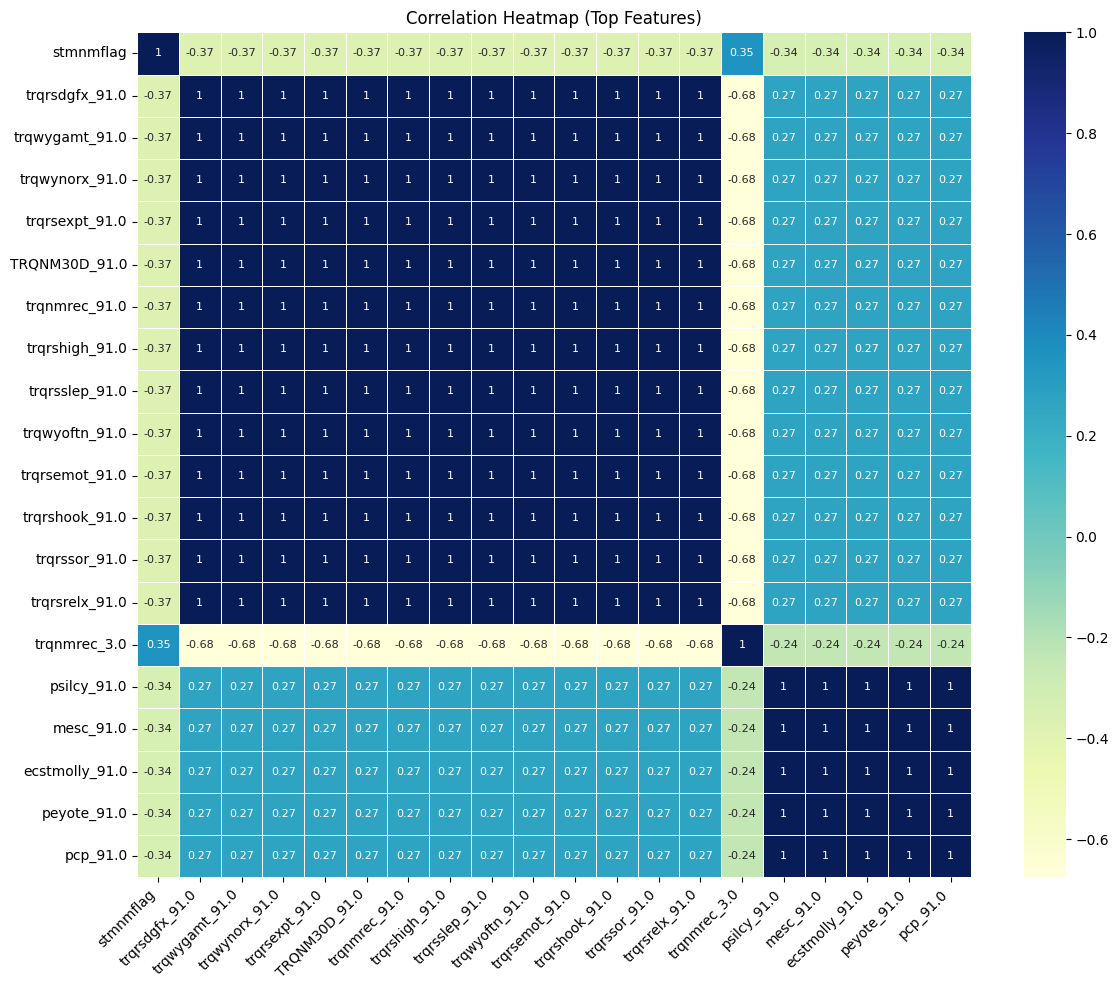

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Concatenate the features and target variable
AllData = pd.concat([X, y], axis=1)

# Step 2: Compute the correlation matrix
corr_matrix = AllData.corr(method='pearson')

# Step 3: Sort features by their correlation with the target variable (optional)
target_correlation = corr_matrix[y.name].abs().sort_values(ascending=False)

# Step 4: Select the top features most correlated with the target
top_n = 20  # Adjust this number based on how many features you want to display
top_features = target_correlation.head(top_n).index
corr_matrix_top = corr_matrix.loc[top_features, top_features]

# Step 5: Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix_top, annot=True, cmap='YlGnBu', annot_kws={"size": 8}, linewidths=0.5)

# Step 6: Customize the plot
plt.title('Correlation Heatmap (Top Features)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


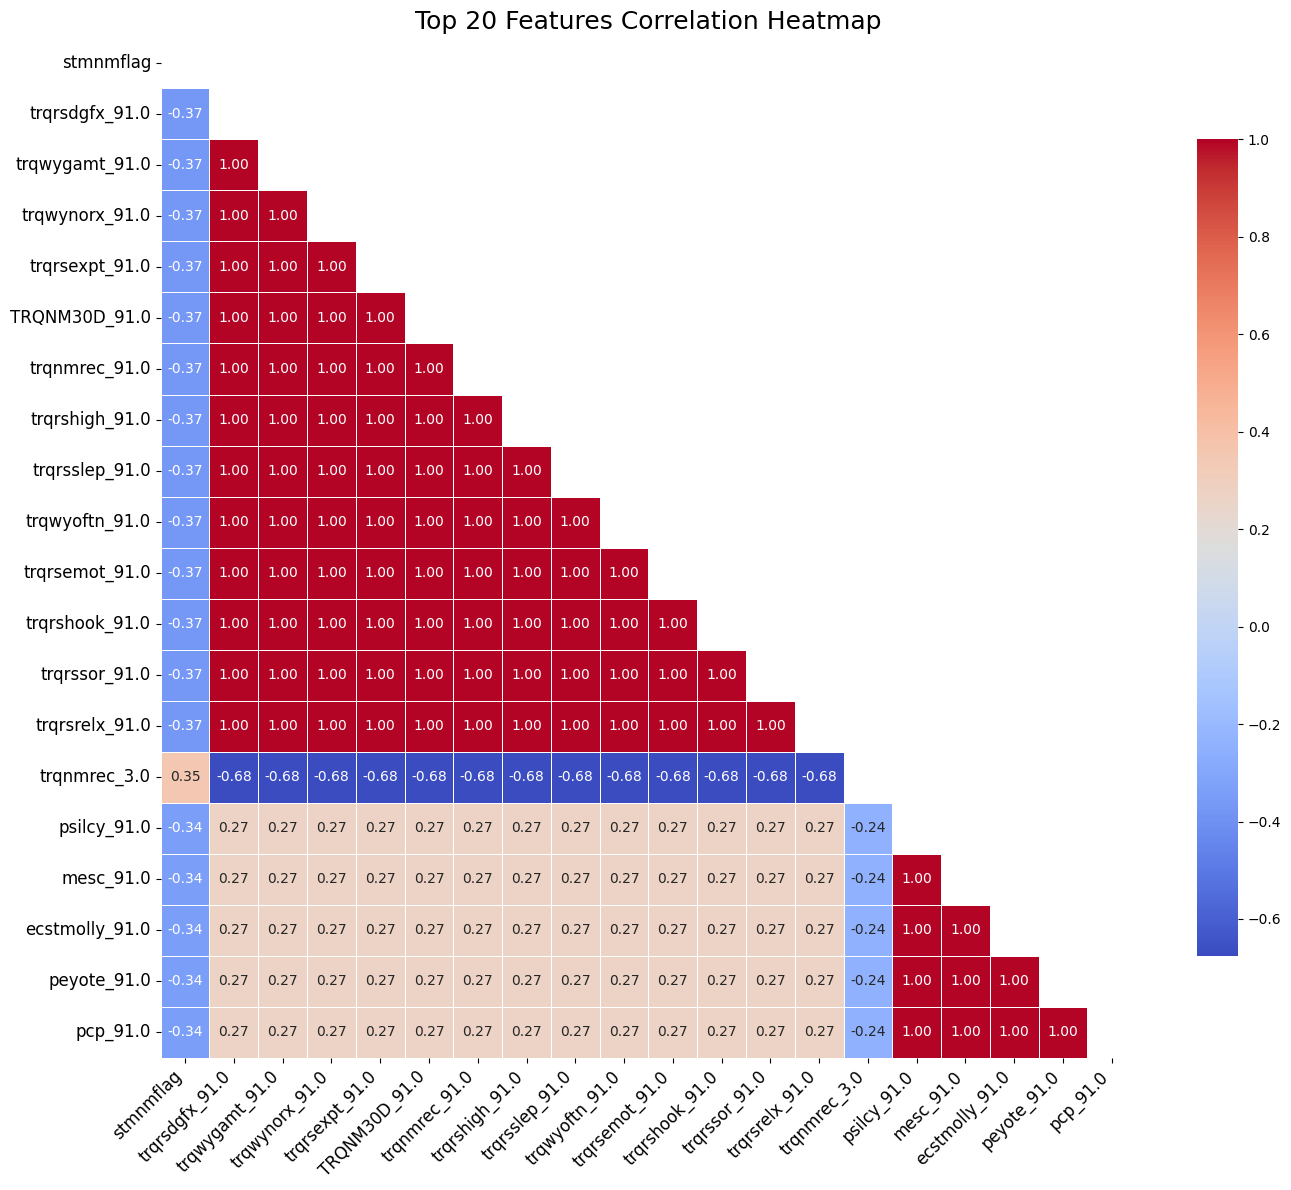

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Concatenate the features and target variable
AllData = pd.concat([X, y], axis=1)

# Step 2: Compute the correlation matrix
corr_matrix = AllData.corr(method='pearson')

# Step 3: Sort features by their correlation with the target variable (optional)
target_correlation = corr_matrix[y.name].abs().sort_values(ascending=False)

# Step 4: Select the top features most correlated with the target
top_n = 20  # Adjust this number based on how many features you want to display
top_features = target_correlation.head(top_n).index
corr_matrix_top = corr_matrix.loc[top_features, top_features]

# Step 5: Create a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix_top, dtype=bool))

# Step 6: Plot the heatmap with enhanced features
plt.figure(figsize=(14, 12))  # Adjust figure size as needed
sns.heatmap(corr_matrix_top, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            annot_kws={"size": 10}, linewidths=0.5, cbar_kws={"shrink": .8})

# Step 7: Customize the plot
plt.title('Top 20 Features Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

plt.show()


** The traditional ML learning models that have their decision boundries plotted, you can see that all the blues and reds are not classified in two seperate clusters and are mixed up this is due to having an unbalanced dataset with mnore No's already about 85 percent so the ML models are good in telling Nos**

In [ ]:
# New Logistic Regression

import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer


# Initialize model (replace this with your model)
lr_model = LogisticRegression(max_iter=200, random_state=1)

# Define cross-validation folds
folds = [3, 5, 10]

# Define custom scorers
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')

# Function to compute classification metrics
def compute_metrics(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Function to perform cross-validation and compute mean and std for classification metrics
def cross_validate_and_compute_stats(model, X, y, folds):
    results = {}
    for fold in folds:
        kf = KFold(n_splits=fold, shuffle=True, random_state=1)

        accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring=accuracy_scorer)
        precision_scores = cross_val_score(model, X, y, cv=kf, scoring=precision_scorer)
        recall_scores = cross_val_score(model, X, y, cv=kf, scoring=recall_scorer)
        f1_scores = cross_val_score(model, X, y, cv=kf, scoring=f1_scorer)

        accuracy_mean, accuracy_std = np.mean(accuracy_scores), np.std(accuracy_scores)
        precision_mean, precision_std = np.mean(precision_scores), np.std(precision_scores)
        recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
        f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

        results[fold] = {
            'accuracy': {'mean': accuracy_mean, 'std': accuracy_std},
            'precision': {'mean': precision_mean, 'std': precision_std},
            'recall': {'mean': recall_mean, 'std': recall_std},
            'f1': {'mean': f1_mean, 'std': f1_std}
        }

        print(f"{fold}-fold CV -> Accuracy: Mean = {accuracy_mean:.4f}, Std = {accuracy_std:.4f} | "
              f"Precision: Mean = {precision_mean:.4f}, Std = {precision_std:.4f} | "
              f"Recall: Mean = {recall_mean:.4f}, Std = {recall_std:.4f} | "
              f"F1: Mean = {f1_mean:.4f}, Std = {f1_std:.4f}")

    return results

# Fit the model on the training set
lr_model.fit(X_train, y_train)

# Compute metrics on the test set
initial_accuracy, initial_precision, initial_recall, initial_f1 = compute_metrics(lr_model, X_test, y_test)
print(f"Test Set -> Accuracy: {initial_accuracy:.4f}, Precision: {initial_precision:.4f}, "
      f"Recall: {initial_recall:.4f}, F1: {initial_f1:.4f}")

# Perform cross-validation and print results
results = cross_validate_and_compute_stats(lr_model, X_train, y_train, folds)

# Print out precision results
for fold in folds:
    print(f"{fold}-fold CV -> Precision: Mean = {results[fold]['precision']['mean']:.4f}, Std = {results[fold]['precision']['std']:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Set -> Accuracy: 0.9587, Precision: 0.9512, Recall: 0.9587, F1: 0.9517


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

3-fold CV -> Accuracy: Mean = 0.9602, Std = 0.0025 | Precision: Mean = 0.9531, Std = 0.0036 | Recall: Mean = 0.9602, Std = 0.0025 | F1: Mean = 0.9541, Std = 0.0024


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

5-fold CV -> Accuracy: Mean = 0.9607, Std = 0.0028 | Precision: Mean = 0.9537, Std = 0.0038 | Recall: Mean = 0.9607, Std = 0.0028 | F1: Mean = 0.9546, Std = 0.0032


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

10-fold CV -> Accuracy: Mean = 0.9604, Std = 0.0031 | Precision: Mean = 0.9533, Std = 0.0043 | Recall: Mean = 0.9604, Std = 0.0031 | F1: Mean = 0.9544, Std = 0.0037
3-fold CV -> Precision: Mean = 0.9531, Std = 0.0036
5-fold CV -> Precision: Mean = 0.9537, Std = 0.0038
10-fold CV -> Precision: Mean = 0.9533, Std = 0.0043


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


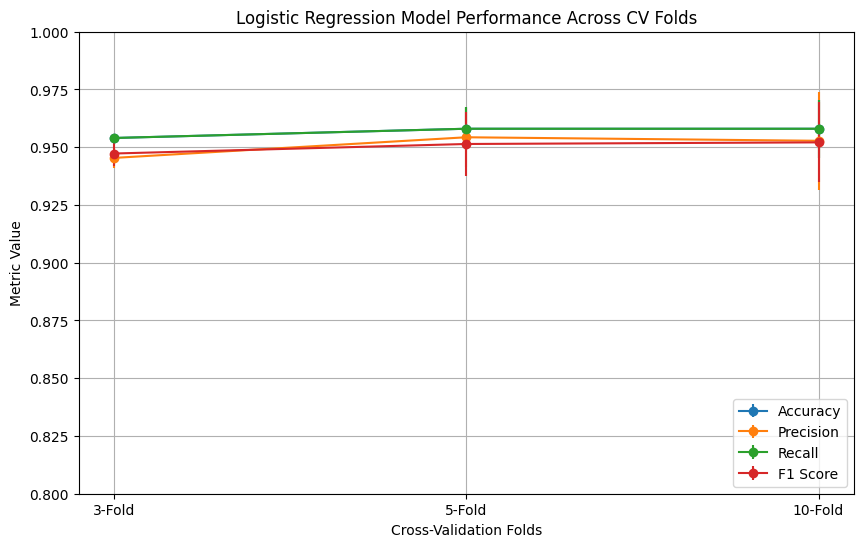

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
folds_labels = ['3-Fold', '5-Fold', '10-Fold']

accuracy_means = [results[3]['accuracy']['mean'], results[5]['accuracy']['mean'], results[10]['accuracy']['mean']]
accuracy_stds = [results[3]['accuracy']['std'], results[5]['accuracy']['std'], results[10]['accuracy']['std']]

precision_means = [results[3]['precision']['mean'], results[5]['precision']['mean'], results[10]['precision']['mean']]
precision_stds = [results[3]['precision']['std'], results[5]['precision']['std'], results[10]['precision']['std']]

recall_means = [results[3]['recall']['mean'], results[5]['recall']['mean'], results[10]['recall']['mean']]
recall_stds = [results[3]['recall']['std'], results[5]['recall']['std'], results[10]['recall']['std']]

f1_means = [results[3]['f1']['mean'], results[5]['f1']['mean'], results[10]['f1']['mean']]
f1_stds = [results[3]['f1']['std'], results[5]['f1']['std'], results[10]['f1']['std']]

# Plot the metrics
plt.figure(figsize=(10, 6))

# Accuracy
plt.errorbar(folds_labels, accuracy_means, yerr=accuracy_stds, label='Accuracy', fmt='-o')

# Precision
plt.errorbar(folds_labels, precision_means, yerr=precision_stds, label='Precision', fmt='-o')

# Recall
plt.errorbar(folds_labels, recall_means, yerr=recall_stds, label='Recall', fmt='-o')

# F1 Score
plt.errorbar(folds_labels, f1_means, yerr=f1_stds, label='F1 Score', fmt='-o')

# Plot customization
plt.title('Logistic Regression Model Performance Across CV Folds')
plt.xlabel('Cross-Validation Folds')
plt.ylabel('Metric Value')
plt.ylim(0.8, 1.0)  # Adjust as necessary based on your metric ranges

plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
!pip install mlxtend

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from IPython.display import Image
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [ ]:
# Min-Max Scaling better to be used because we have binary classification and can set min to 0 and max to 1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

#We are using only 1000 datapoints to prevent kernle crash for SVM/KNN
index_1000 = np.random.choice(X_scaled.shape[0], size=1000, replace=False)
X_1000 = X_scaled[index_1000] # axis=1 is for the columns, we are having 0 for rows.
y_1000 = y[index_1000]

X_1000_train, X_1000_test, y_1000_train, y_1000_test = train_test_split(X_1000, y_1000, train_size=0.8, random_state=3)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer


# Initialize model (replace this with your model)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Define cross-validation folds
folds = [3, 5, 10]

# Define custom scorers
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')

# Function to compute classification metrics
def compute_metrics(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Function to perform cross-validation and compute mean and std for classification metrics
def cross_validate_and_compute_stats(model, X, y, folds):
    results = {}
    for fold in folds:
        kf = KFold(n_splits=fold, shuffle=True, random_state=1)

        accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring=accuracy_scorer)
        precision_scores = cross_val_score(model, X, y, cv=kf, scoring=precision_scorer)
        recall_scores = cross_val_score(model, X, y, cv=kf, scoring=recall_scorer)
        f1_scores = cross_val_score(model, X, y, cv=kf, scoring=f1_scorer)

        accuracy_mean, accuracy_std = np.mean(accuracy_scores), np.std(accuracy_scores)
        precision_mean, precision_std = np.mean(precision_scores), np.std(precision_scores)
        recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
        f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

        results[fold] = {
            'accuracy': {'mean': accuracy_mean, 'std': accuracy_std},
            'precision': {'mean': precision_mean, 'std': precision_std},
            'recall': {'mean': recall_mean, 'std': recall_std},
            'f1': {'mean': f1_mean, 'std': f1_std}
        }

        print(f"{fold}-fold CV -> Accuracy: Mean = {accuracy_mean:.4f}, Std = {accuracy_std:.4f} | "
              f"Precision: Mean = {precision_mean:.4f}, Std = {precision_std:.4f} | "
              f"Recall: Mean = {recall_mean:.4f}, Std = {recall_std:.4f} | "
              f"F1: Mean = {f1_mean:.4f}, Std = {f1_std:.4f}")

    return results

# Fit the model on the training set
svm_model.fit(X_1000_train, y_1000_train)

# Compute metrics on the test set
initial_accuracy, initial_precision, initial_recall, initial_f1 = compute_metrics(svm_model, X_1000_test, y_1000_test)
print(f"Test Set -> Accuracy: {initial_accuracy:.4f}, Precision: {initial_precision:.4f}, "
      f"Recall: {initial_recall:.4f}, F1: {initial_f1:.4f}")

# Perform cross-validation and print results
results = cross_validate_and_compute_stats(svm_model, X_1000_train, y_1000_train, folds)

# Print out precision results
for fold in folds:
    print(f"{fold}-fold CV -> Precision: Mean = {results[fold]['precision']['mean']:.4f}, Std = {results[fold]['precision']['std']:.4f}")


Test Set -> Accuracy: 0.9150, Precision: 0.9441, Recall: 0.9150, F1: 0.9284
3-fold CV -> Accuracy: Mean = 0.9475, Std = 0.0030 | Precision: Mean = 0.9460, Std = 0.0051 | Recall: Mean = 0.9475, Std = 0.0030 | F1: Mean = 0.9467, Std = 0.0040
5-fold CV -> Accuracy: Mean = 0.9400, Std = 0.0064 | Precision: Mean = 0.9415, Std = 0.0051 | Recall: Mean = 0.9400, Std = 0.0064 | F1: Mean = 0.9407, Std = 0.0054
10-fold CV -> Accuracy: Mean = 0.9437, Std = 0.0170 | Precision: Mean = 0.9469, Std = 0.0190 | Recall: Mean = 0.9437, Std = 0.0170 | F1: Mean = 0.9431, Std = 0.0175
3-fold CV -> Precision: Mean = 0.9460, Std = 0.0051
5-fold CV -> Precision: Mean = 0.9415, Std = 0.0051
10-fold CV -> Precision: Mean = 0.9469, Std = 0.0190


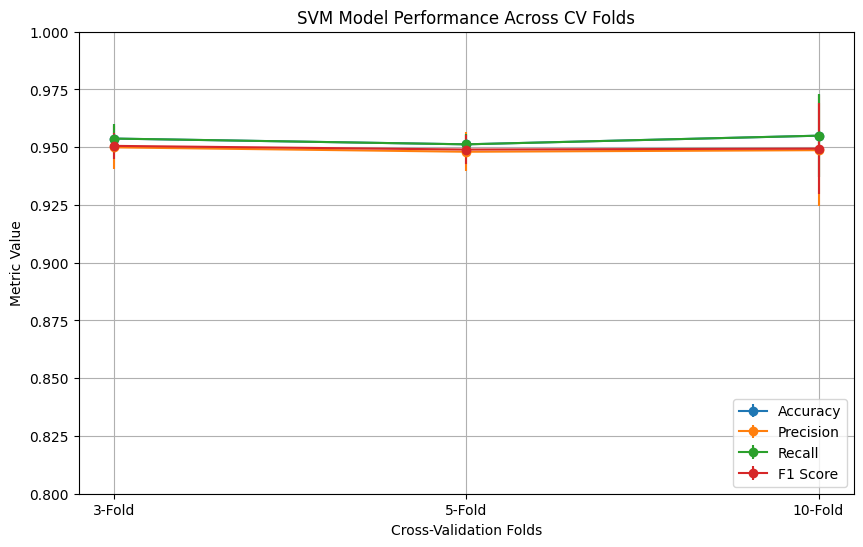

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
folds_labels = ['3-Fold', '5-Fold', '10-Fold']

accuracy_means = [results[3]['accuracy']['mean'], results[5]['accuracy']['mean'], results[10]['accuracy']['mean']]
accuracy_stds = [results[3]['accuracy']['std'], results[5]['accuracy']['std'], results[10]['accuracy']['std']]

precision_means = [results[3]['precision']['mean'], results[5]['precision']['mean'], results[10]['precision']['mean']]
precision_stds = [results[3]['precision']['std'], results[5]['precision']['std'], results[10]['precision']['std']]

recall_means = [results[3]['recall']['mean'], results[5]['recall']['mean'], results[10]['recall']['mean']]
recall_stds = [results[3]['recall']['std'], results[5]['recall']['std'], results[10]['recall']['std']]

f1_means = [results[3]['f1']['mean'], results[5]['f1']['mean'], results[10]['f1']['mean']]
f1_stds = [results[3]['f1']['std'], results[5]['f1']['std'], results[10]['f1']['std']]

# Plot the metrics
plt.figure(figsize=(10, 6))

# Accuracy
plt.errorbar(folds_labels, accuracy_means, yerr=accuracy_stds, label='Accuracy', fmt='-o')

# Precision
plt.errorbar(folds_labels, precision_means, yerr=precision_stds, label='Precision', fmt='-o')

# Recall
plt.errorbar(folds_labels, recall_means, yerr=recall_stds, label='Recall', fmt='-o')

# F1 Score
plt.errorbar(folds_labels, f1_means, yerr=f1_stds, label='F1 Score', fmt='-o')

# Plot customization
plt.title('SVM Model Performance Across CV Folds')
plt.xlabel('Cross-Validation Folds')
plt.ylabel('Metric Value')
plt.ylim(0.8, 1.0)  # Adjust as necessary based on your metric ranges
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


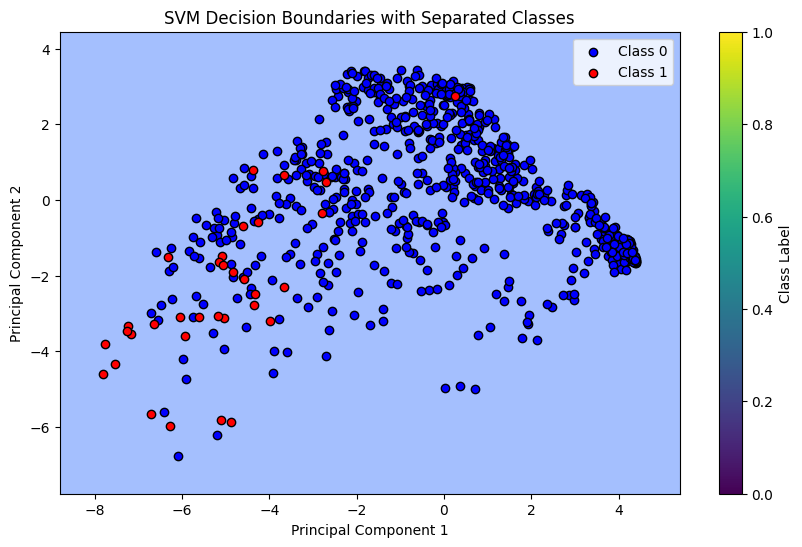

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_1000_train_reduced = pca.fit_transform(X_1000_train)
X_1000_test_reduced = pca.transform(X_1000_test)

# Fit the SVM model on the reduced dataset
svm_model.fit(X_1000_train_reduced, y_1000_train)

# Create a mesh grid for plotting decision boundaries with a finer resolution
x_min, x_max = X_1000_train_reduced[:, 0].min() - 1, X_1000_train_reduced[:, 0].max() + 1
y_min, y_max = X_1000_train_reduced[:, 1].min() - 1, X_1000_train_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict on the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Scatter plot for the training data with separated blue and red points
class_0 = y_1000_train == 0
class_1 = y_1000_train == 1

plt.scatter(X_1000_train_reduced[class_0, 0], X_1000_train_reduced[class_0, 1], c='blue', label='Class 0', edgecolor='k')
plt.scatter(X_1000_train_reduced[class_1, 0], X_1000_train_reduced[class_1, 1], c='red', label='Class 1', edgecolor='k')

# Add labels, legend, and title
plt.title("SVM Decision Boundaries with Separated Classes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="upper right")
plt.colorbar(label="Class Label")
plt.show()


In [ ]:
# Assuming original data was split into X_train and y_train before PCA

# Apply PCA to the training data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
X_1000_train_reduced = pca.fit_transform(X_1000_train)

# Verify that y_1000_train matches the number of samples in X_1000_train_reduced
assert X_1000_train_reduced.shape[0] == y_1000_train.shape[0], "Mismatch in the number of samples."


In [ ]:
print(f"X_1000_train_reduced shape: {X_1000_train_reduced.shape}")
print(f"y_1000_train shape: {y_1000_train.shape}")


X_1000_train_reduced shape: (800, 2)
y_1000_train shape: (800,)


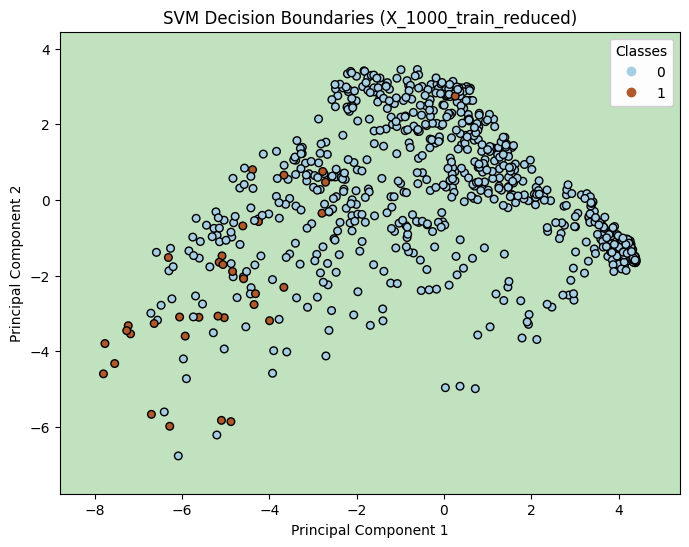

In [ ]:
# Reduce dimensions to 2D using PCA to plot SVM
pca = PCA(n_components=2)
X_1000_train_reduced = pca.fit_transform(X_1000_train)
svm_model.fit(X_1000_train_reduced, y_1000_train)

# Define function to plot decision boundaries
def plot_decision_boundaries(X_reduced, y, classifier, ax, title):
    # Define ranges to plot the decision boundaries
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the label for each point in the mesh
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # Plot the training points
    scatter = ax.scatter(X_1000_train_reduced[:, 0], X_1000_train_reduced[:, 1], c=y_1000_train, s=30, edgecolor='k', cmap=plt.cm.Paired)
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the decision boundaries and the data points for the training set
plot_decision_boundaries(X_1000_train_reduced, X_1000_train_reduced, svm_model, ax, "SVM Decision Boundaries (X_1000_train_reduced)")

plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer



# Initialize the KNN model
k = 5  # Example value for the number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)

# Define cross-validation folds
folds = [3, 5, 10]

# Define custom scorers
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')

# Function to compute classification metrics
def compute_metrics(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Function to perform cross-validation and compute mean and std for classification metrics
def cross_validate_and_compute_stats(model, X, y, folds):
    results = {}
    for fold in folds:
        kf = KFold(n_splits=fold, shuffle=True, random_state=1)

        accuracy_scores = cross_val_score(model, X_1000_train, y_1000_train, cv=kf, scoring=accuracy_scorer)
        precision_scores = cross_val_score(model, X_1000_train, y_1000_train, cv=kf, scoring=precision_scorer)
        recall_scores = cross_val_score(model, X_1000_train, y_1000_train, cv=kf, scoring=recall_scorer)
        f1_scores = cross_val_score(model, X_1000_train, y_1000_train, cv=kf, scoring=f1_scorer)

        accuracy_mean, accuracy_std = np.mean(accuracy_scores), np.std(accuracy_scores)
        precision_mean, precision_std = np.mean(precision_scores), np.std(precision_scores)
        recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
        f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

        results[fold] = {
            'accuracy': {'mean': accuracy_mean, 'std': accuracy_std},
            'precision': {'mean': precision_mean, 'std': precision_std},
            'recall': {'mean': recall_mean, 'std': recall_std},
            'f1': {'mean': f1_mean, 'std': f1_std}
        }

        print(f"{fold}-fold CV -> Accuracy: Mean = {accuracy_mean:.4f}, Std = {accuracy_std:.4f} | "
              f"Precision: Mean = {precision_mean:.4f}, Std = {precision_std:.4f} | "
              f"Recall: Mean = {recall_mean:.4f}, Std = {recall_std:.4f} | "
              f"F1: Mean = {f1_mean:.4f}, Std = {f1_std:.4f}")

    return results


# Fit the model on the training set
knn_model.fit(X_1000_train, y_1000_train)

# Compute metrics on the test set
initial_accuracy, initial_precision, initial_recall, initial_f1 = compute_metrics(knn_model, X_1000_test, y_1000_test)
print(f"Test Set -> Accuracy: {initial_accuracy:.4f}, Precision: {initial_precision:.4f}, "
      f"Recall: {initial_recall:.4f}, F1: {initial_f1:.4f}")

# Perform cross-validation and print results
results = cross_validate_and_compute_stats(knn_model, X_1000_train, y_1000_test, folds)


Test Set -> Accuracy: 0.9200, Precision: 0.8843, Recall: 0.9200, F1: 0.8946
3-fold CV -> Accuracy: Mean = 0.9550, Std = 0.0170 | Precision: Mean = 0.9541, Std = 0.0164 | Recall: Mean = 0.9550, Std = 0.0170 | F1: Mean = 0.9429, Std = 0.0297


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5-fold CV -> Accuracy: Mean = 0.9512, Std = 0.0214 | Precision: Mean = 0.9323, Std = 0.0508 | Recall: Mean = 0.9512, Std = 0.0214 | F1: Mean = 0.9390, Std = 0.0350


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

10-fold CV -> Accuracy: Mean = 0.9525, Std = 0.0278 | Precision: Mean = 0.9299, Std = 0.0595 | Recall: Mean = 0.9525, Std = 0.0278 | F1: Mean = 0.9377, Std = 0.0430


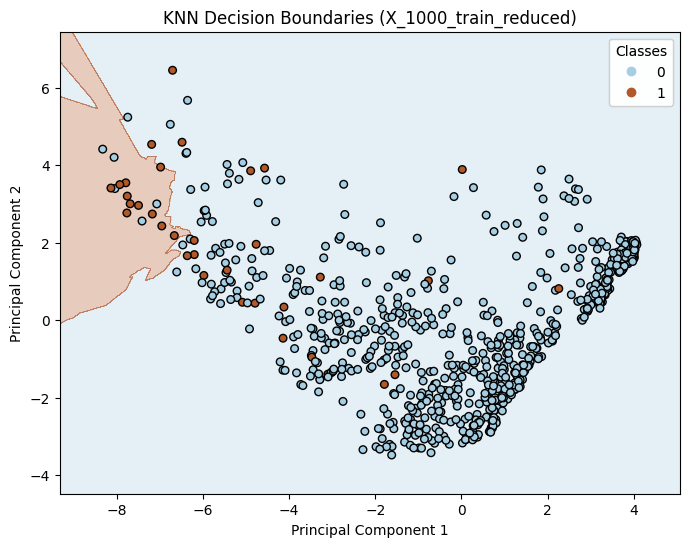

In [ ]:
# The KNN Decision Boundry plt below is when we use 1000 data points which is 800 training and 200 testing, this graph looks better than the one using all the datapoints.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming `X_1000_train` and `y_1000_train` are already defined and preprocessed

# Step 1: Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_1000_train_reduced = pca.fit_transform(X_1000_train)

# Step 2: Initialize and train the KNN model on the reduced 2D data
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_1000_train_reduced, y_1000_train)

# Step 3: Define the function to plot decision boundaries
def plot_decision_boundaries(X_reduced, y, classifier, ax, title):
    # Define ranges to plot the decision boundaries
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the label for each point in the mesh
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # Plot the training points
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.Paired)
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)

# Step 4: Create a figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Step 5: Plot the decision boundaries and the data points for the training set
plot_decision_boundaries(X_1000_train_reduced, y_1000_train, knn_model, ax, "KNN Decision Boundaries (X_1000_train_reduced)")

plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer


# Initialize the MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)

# Define cross-validation folds
folds = [3, 5, 10]

# Define custom scorers
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')

# Function to compute classification metrics
def compute_metrics(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Function to perform cross-validation and compute mean and std for classification metrics
def cross_validate_and_compute_stats(model, X, y, folds):
    results = {}
    for fold in folds:
        kf = KFold(n_splits=fold, shuffle=True, random_state=1)

        accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring=accuracy_scorer)
        precision_scores = cross_val_score(model, X, y, cv=kf, scoring=precision_scorer)
        recall_scores = cross_val_score(model, X, y, cv=kf, scoring=recall_scorer)
        f1_scores = cross_val_score(model, X, y, cv=kf, scoring=f1_scorer)

        accuracy_mean, accuracy_std = np.mean(accuracy_scores), np.std(accuracy_scores)
        precision_mean, precision_std = np.mean(precision_scores), np.std(precision_scores)
        recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
        f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

        results[fold] = {
            'accuracy': {'mean': accuracy_mean, 'std': accuracy_std},
            'precision': {'mean': precision_mean, 'std': precision_std},
            'recall': {'mean': recall_mean, 'std': recall_std},
            'f1': {'mean': f1_mean, 'std': f1_std}
        }

        print(f"{fold}-fold CV -> Accuracy: Mean = {accuracy_mean:.4f}, Std = {accuracy_std:.4f} | "
              f"Precision: Mean = {precision_mean:.4f}, Std = {precision_std:.4f} | "
              f"Recall: Mean = {recall_mean:.4f}, Std = {recall_std:.4f} | "
              f"F1: Mean = {f1_mean:.4f}, Std = {f1_std:.4f}")

    return results


# Fit the model on the training set
mlp_model.fit(X_train, y_train)

# Compute metrics on the test set
initial_accuracy, initial_precision, initial_recall, initial_f1 = compute_metrics(mlp_model, X_test, y_test)
print(f"Test Set -> Accuracy: {initial_accuracy:.4f}, Precision: {initial_precision:.4f}, "
      f"Recall: {initial_recall:.4f}, F1: {initial_f1:.4f}")

# Perform cross-validation and print results
results = cross_validate_and_compute_stats(mlp_model, X_train, y_train, folds)


In [ ]:
print(X_1000_train_reduced.shape)
print(X_test.shape)

(800, 2)
(11814, 1349)


In [ ]:
# using only 1000 datapoints

import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

# Initialize the MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)

# Define cross-validation folds
folds = [3, 5, 10]

# Define custom scorers
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')

# Function to compute classification metrics
def compute_metrics(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Function to perform cross-validation and compute mean and std for classification metrics
def cross_validate_and_compute_stats(model, X, y, folds):
    results = {}
    for fold in folds:
        kf = KFold(n_splits=fold, shuffle=True, random_state=1)

        accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring=accuracy_scorer)
        precision_scores = cross_val_score(model, X, y, cv=kf, scoring=precision_scorer)
        recall_scores = cross_val_score(model, X, y, cv=kf, scoring=recall_scorer)
        f1_scores = cross_val_score(model, X, y, cv=kf, scoring=f1_scorer)

        accuracy_mean, accuracy_std = np.mean(accuracy_scores), np.std(accuracy_scores)
        precision_mean, precision_std = np.mean(precision_scores), np.std(precision_scores)
        recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
        f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

        results[fold] = {
            'accuracy': {'mean': accuracy_mean, 'std': accuracy_std},
            'precision': {'mean': precision_mean, 'std': precision_std},
            'recall': {'mean': recall_mean, 'std': recall_std},
            'f1': {'mean': f1_mean, 'std': f1_std}
        }

        print(f"{fold}-fold CV -> Accuracy: Mean = {accuracy_mean:.4f}, Std = {accuracy_std:.4f} | "
              f"Precision: Mean = {precision_mean:.4f}, Std = {precision_std:.4f} | "
              f"Recall: Mean = {recall_mean:.4f}, Std = {recall_std:.4f} | "
              f"F1: Mean = {f1_mean:.4f}, Std = {f1_std:.4f}")

    return results

# Fit the model on the 1000-point training set
mlp_model.fit(X_1000_train, y_1000_train)

# Compute metrics on the test set
initial_accuracy, initial_precision, initial_recall, initial_f1 = compute_metrics(mlp_model, X_1000_test, y_1000_test)
print(f"Test Set -> Accuracy: {initial_accuracy:.4f}, Precision: {initial_precision:.4f}, "
      f"Recall: {initial_recall:.4f}, F1: {initial_f1:.4f}")

# Perform cross-validation and print results on the 1000-point dataset
results = cross_validate_and_compute_stats(mlp_model, X_1000, y_1000, folds)


Test Set -> Accuracy: 0.9450, Precision: 0.9233, Recall: 0.9450, F1: 0.9307
3-fold CV -> Accuracy: Mean = 0.9540, Std = 0.0013 | Precision: Mean = 0.9454, Std = 0.0045 | Recall: Mean = 0.9540, Std = 0.0013 | F1: Mean = 0.9473, Std = 0.0056
5-fold CV -> Accuracy: Mean = 0.9580, Std = 0.0093 | Precision: Mean = 0.9543, Std = 0.0128 | Recall: Mean = 0.9580, Std = 0.0093 | F1: Mean = 0.9514, Std = 0.0139
10-fold CV -> Accuracy: Mean = 0.9580, Std = 0.0125 | Precision: Mean = 0.9528, Std = 0.0212 | Recall: Mean = 0.9580, Std = 0.0125 | F1: Mean = 0.9521, Std = 0.0173


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000, random_state=42)
mlp.fit(X_1000_train_reduced, y_1000_train)

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the decision boundaries and the data points for the training set
plot_decision_boundaries(X_1000_train_reduced, y_1000_train, mlp, ax, "MLP Decision Boundaries (Training set)")

plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer


# Initialize model (replace this with your model)
gb_model = GaussianNB()

# Define cross-validation folds
folds = [3, 5, 10]

# Define custom scorers
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')

# Function to compute classification metrics
def compute_metrics(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Function to perform cross-validation and compute mean and std for classification metrics
def cross_validate_and_compute_stats(model, X, y, folds):
    results = {}
    for fold in folds:
        kf = KFold(n_splits=fold, shuffle=True, random_state=1)

        accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring=accuracy_scorer)
        precision_scores = cross_val_score(model, X, y, cv=kf, scoring=precision_scorer)
        recall_scores = cross_val_score(model, X, y, cv=kf, scoring=recall_scorer)
        f1_scores = cross_val_score(model, X, y, cv=kf, scoring=f1_scorer)

        accuracy_mean, accuracy_std = np.mean(accuracy_scores), np.std(accuracy_scores)
        precision_mean, precision_std = np.mean(precision_scores), np.std(precision_scores)
        recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
        f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

        results[fold] = {
            'accuracy': {'mean': accuracy_mean, 'std': accuracy_std},
            'precision': {'mean': precision_mean, 'std': precision_std},
            'recall': {'mean': recall_mean, 'std': recall_std},
            'f1': {'mean': f1_mean, 'std': f1_std}
        }

        print(f"{fold}-fold CV -> Accuracy: Mean = {accuracy_mean:.4f}, Std = {accuracy_std:.4f} | "
              f"Precision: Mean = {precision_mean:.4f}, Std = {precision_std:.4f} | "
              f"Recall: Mean = {recall_mean:.4f}, Std = {recall_std:.4f} | "
              f"F1: Mean = {f1_mean:.4f}, Std = {f1_std:.4f}")

    return results

# Fit the model and compute metrics before cross-validation
gb_model.fit(X, y)
initial_accuracy, initial_precision, initial_recall, initial_f1 = compute_metrics(gb_model, X, y)
print(f"Before CV -> Accuracy: {initial_accuracy:.4f}, Precision: {initial_precision:.4f}, "
      f"Recall: {initial_recall:.4f}, F1: {initial_f1:.4f}")

# Perform cross-validation and print results
results = cross_validate_and_compute_stats(gb_model, X, y, folds)


Before CV -> Accuracy: 0.9080, Precision: 0.9523, Recall: 0.9080, F1: 0.9250
3-fold CV -> Accuracy: Mean = 0.9079, Std = 0.0019 | Precision: Mean = 0.9522, Std = 0.0009 | Recall: Mean = 0.9079, Std = 0.0019 | F1: Mean = 0.9250, Std = 0.0015
5-fold CV -> Accuracy: Mean = 0.9079, Std = 0.0020 | Precision: Mean = 0.9523, Std = 0.0016 | Recall: Mean = 0.9079, Std = 0.0020 | F1: Mean = 0.9250, Std = 0.0014
10-fold CV -> Accuracy: Mean = 0.9079, Std = 0.0023 | Precision: Mean = 0.9523, Std = 0.0019 | Recall: Mean = 0.9079, Std = 0.0023 | F1: Mean = 0.9250, Std = 0.0017


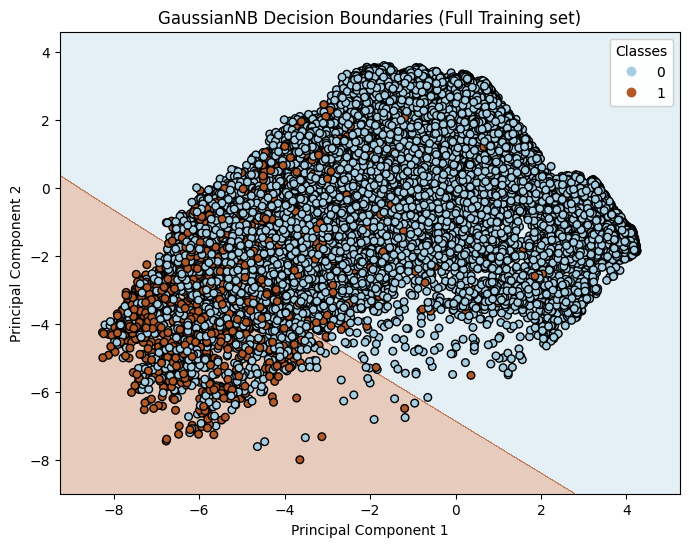

In [ ]:
# plot below is when using all the data points.

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_reduced, y_train)

# Define function to plot decision boundaries
def plot_decision_boundaries(X_reduced, y, classifier, ax, title):
    # Define ranges to plot the decision boundaries
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the label for each point in the mesh
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # Plot the training points
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.Paired)
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the decision boundaries and the data points for the training set
plot_decision_boundaries(X_reduced, y_train, nb, ax, "GaussianNB Decision Boundaries (Full Training set)")

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Performing GridSearch to find the best hyperparameters for the GradientBoost with 1000 datapoints
param_grid = {"n_estimators":[300, 500],
             "max_depth":[8,12, 16],
             "min_samples_split":[3, 5],
              "subsample" :[0.8,0.9],
             "learning_rate":[0.05, 0.1],
              }
gb_model = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb_model, param_grid = param_grid, verbose = 3)
gb_cv.fit(X_1000_train, y_1000_train)
print(gb_cv.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.963 total time=   9.0s
[CV 2/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.950 total time=  10.0s
[CV 3/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.956 total time=   7.9s
[CV 4/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.944 total time=  10.0s
[CV 5/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.938 total time=   9.4s
[CV 1/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.9;, score=0.950 total time=   9.5s
[CV 2/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.9;, score=0.938 total time=  12.3s
[CV 3/5] END l

In [ ]:
# n_estimator = 500 min_sample_split = 4
from sklearn.ensemble import HistGradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators = 500, max_depth = 12, subsample = 0.8, learning_rate = 0.05, min_samples_split = 5 )
gb_model.fit(X_train,y_train)

gb_model.score(X_test, y_test)

0.9565769426104621

In [ ]:
y_gb_model = gb_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_gb_model))

print("\nClassification Report:")
print(classification_report(y_test, y_gb_model))


Confusion Matrix:
[[11114   112]
 [  401   187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11226
           1       0.63      0.32      0.42       588

    accuracy                           0.96     11814
   macro avg       0.80      0.65      0.70     11814
weighted avg       0.95      0.96      0.95     11814



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=1,
                              random_state=1)

tree = tree.fit(X_train, y_train)

tree.score(X_test, y_test)

0.9502285424073134

In [ ]:
y_pred = tree.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[11226     0]
 [  588     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     11226
           1       0.00      0.00      0.00       588

    accuracy                           0.95     11814
   macro avg       0.48      0.50      0.49     11814
weighted avg       0.90      0.95      0.93     11814



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base estimator
tree = DecisionTreeClassifier(max_depth=1, random_state=1)

# Create the AdaBoostClassifier with the correct parameter
ada = AdaBoostClassifier(estimator=tree,
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1)

# Fit the model
ada = ada.fit(X_train, y_train)

# Evaluate the model
score = ada.score(X_test, y_test)
print(f"Accuracy: {score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9582


In [ ]:
# Evaluate the classifier

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9502
Confusion Matrix:
[[11226     0]
 [  588     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     11226
           1       0.00      0.00      0.00       588

    accuracy                           0.95     11814
   macro avg       0.48      0.50      0.49     11814
weighted avg       0.90      0.95      0.93     11814



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df_selected.head()

,ANALWT2_C,stmnmflag,PDEN10_2,PDEN10_3,COUTYP4_2,COUTYP4_3,MAIIN102_2,AGE3_10,AGE3_11,AGE3_2,...,trqrshook_2.0,trqrshook_91.0,trqrshook_93.0,trqrshook_nan,trqrssor_2.0,trqrssor_91.0,trqrssor_93.0,trqrssor_nan,trbzonmyr_1.0,trbzonmyr_nan
0,298.004021,0,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,2292.377696,0,True,False,True,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2,216.604339,0,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,13828.218374,0,True,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
4,6282.612060,0,True,False,True,False,True,True,False,False,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
df_selected.shape

(59069, 1350)

In [ ]:
df_selected.isna().any()

,0
ANALWT2_C,False
stmnmflag,False
PDEN10_2,False
PDEN10_3,False
COUTYP4_2,False
...,...
trqrssor_91.0,False
trqrssor_93.0,False
trqrssor_nan,False
trbzonmyr_1.0,False


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer


# # Initialize the IterativeImputer
# imputer = IterativeImputer(max_iter=10, random_state=0, verbose = 2)

# # Fit and transform the data
# # fit means that with chain rules and partial derivatives you imopute the data, and transform means to overide the NaNs and overide them with imputed data.
# df_imputed = imputer.fit_transform(df_selected)

# # Convert the result back to a DataFrame
# df_imputed = pd.DataFrame(df_imputed, columns=df_selected.columns)

# # Display the imputed DataFrame
# print(df_imputed)

# # mputed data is transformed to ensure the completeness and usability of datasets.
# # Imputation techniques can help to overcome potential biases and gaps in information, which can lead to inaccurate results and unforeseen biases if incomplete data is used in analysis.
# # by creating a liost of ddf_selected we made sure to only use the 150 variables concatenated from dummies, re-coded, and as_is ones. This should reduce the timing of the imputation for all the 2600 variables.




*   Before Imputation we had to drop the NaN values and feed them into the KNN to build the GCN architecture by only taking a random sample of 5000 rows. Now after imputation we will do this with the imputed data.
*   Now we can use all 59000 rows instead of only using 5000.


*   Instead of Falase/True we are getting 0 and 1.
*   List item





In [ ]:
# df_imputed.head()

### Iterative Imputation was too memory intensive, given the large number of columns so all the missing data instead are dropped as above.

We do 2630 x 10 regressions and then we will use the predicted values for the NaN based on average of all 10 Regressions for that column. Each column takes the term of being the Y variable. We impute all missing values and then we will create a network graph with 2630 features and then we will. IF for the Y variable/target we have an unbalanced class we can use the SMOTE to balance it out.

In [ ]:
# # after imputation we transofrm it to a dataset that does not having any missing values.
# # data_imp = imputer.transform(df_sample)

# # Assuming data_imp is a numpy array
# np.isnan(df_imputed).sum()

# # Convert to DataFrame
# # data_imp = pd.DataFrame(data_imputed)

# #  pandas method FOR doing across column and rows so sum it twice
# df_imputed.isna().sum().sum()


In [ ]:
# df_imputed.shape


In [ ]:
# # we scale it so the KNN works.If its not scaled the features that have larger scale will overlly influence the data.
# from sklearn.preprocessing import MinMaxScaler
# # Assuming you have a dataset X and corresponding labels y

# X = df_imputed.drop(columns = ['stmnmflag', 'ANALWT2_C'])  # dataset features
# y = df_imputed['stmnmflag'].to_numpy() # dataset labels
# weight = df_imputed['ANALWT2_C'].to_numpy() # dataset labels from panda to numpy
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)


In [ ]:
# we scale it so the KNN works.If its not scaled the features that have larger scale will overlly influence the data.
from sklearn.preprocessing import MinMaxScaler
# Assuming you have a dataset X and corresponding labels y

X = df_selected.drop(columns = ['stmnmflag', 'ANALWT2_C'])  # dataset features
y = df_selected['stmnmflag'].to_numpy() # dataset labels
weight = df_selected['ANALWT2_C'].to_numpy() # dataset labels from panda to numpy
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# If we would drop all the NaNs we were using 5000 randomly selected rows as below:
# Not able to choose first 5000 rows
# replace = False means we are not selecting any rows twice

index = np.random.choice(X_scaled.shape[0], size= 5000, replace = False)
X_less_rows = X_scaled[index]
y_less_rows = y[index]
weight_less_rows = weight[index]


In [ ]:
X_less_rows.shape

(5000, 1348)

In [ ]:
# # adjacency matrix is (5000, 5000), one row for every patient, so the nodes are patients and edges say based on KNN clutering says this number of patients hafe similarity, zeros everwhere except on the 5 neighbors that is 1.
# # the 1s are the similarities between those patients.

# from sklearn.neighbors import kneighbors_graph
# k = 11
# A  = kneighbors_graph(X_less_rows, k, mode = 'connectivity', include_self = False)
# graph = A.toarray()
# print("Adjacency Matrix:")
# print(graph)

# # A stands for the Adjacency Matrix.
# A.shape

# # 11k * 5000 = 550000


In [ ]:
from sklearn.neighbors import kneighbors_graph
import numpy as np

# Create a weighted KNN graph (distance-based)
k = 11
A = kneighbors_graph(X_less_rows, k, mode='distance', include_self=False)

# Convert to a dense array (optional, for visualization/debugging purposes)
graph = A.toarray()

# Check adjacency matrix
print("Weighted Adjacency Matrix:")
print(graph)

# Confirm shape
print(f"Shape of the adjacency matrix: {A.shape}")


Weighted Adjacency Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of the adjacency matrix: (5000, 5000)


**The issue arises because the adjacency matrix (A) is sparse, with the majority of its entries being 0 since it represents a k-nearest neighbors graph. The kneighbors_graph function only populates the non-zero entries for the nearest neighbors, and the rest are left as 0. When you print the dense version of the matrix with toarray(), the sparsity makes it look like an empty matrix.**

Here’s how you can verify and handle the sparsity: **bold text**

In [ ]:
# Count non-zero entries
print(f"Number of non-zero entries: {A.nnz}")

# Print a few non-zero values
rows, cols = A.nonzero()
print("Sample non-zero entries:")
for i in range(10):  # Print the first 10
    print(f"A[{rows[i]}, {cols[i]}] = {A[rows[i], cols[i]]}")

###### The output confirms that your adjacency matrix is populated correctly with distances for the nearest neighbors. The non-zero entries represent the actual distances between patients, which can now be used as weights for your graph.

Number of non-zero entries: 55000
Sample non-zero entries:
A[0, 3964] = 3.3166247903554
A[0, 4421] = 3.4641016151377544
A[0, 4939] = 3.4641016151377544
A[0, 4075] = 3.872983346207417
A[0, 2627] = 3.872983346207417
A[0, 425] = 4.0
A[0, 4497] = 4.0
A[0, 1384] = 4.123105625617661
A[0, 3292] = 4.123105625617661
A[0, 3941] = 4.123105625617661


In [ ]:
import networkx as nx

# Create a weighted NetworkX graph from the sparse adjacency matrix
G = nx.from_scipy_sparse_array(A)

# Print sample edge weights
print("Sample edge weights from NetworkX graph:")
for u, v, d in list(G.edges(data=True))[:10]:  # Print the first 10 edges
    print(f"Edge ({u}, {v}) weight: {d['weight']}")

Sample edge weights from NetworkX graph:
Edge (0, 3964) weight: 3.3166247903554
Edge (0, 4421) weight: 3.4641016151377544
Edge (0, 4939) weight: 3.4641016151377544
Edge (0, 4075) weight: 3.872983346207417
Edge (0, 2627) weight: 3.872983346207417
Edge (0, 425) weight: 4.0
Edge (0, 4497) weight: 4.0
Edge (0, 1384) weight: 4.123105625617661
Edge (0, 3292) weight: 4.123105625617661
Edge (0, 3941) weight: 4.123105625617661


In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.4 MB/s eta 0:00:00


our adjacency matrix is currently binary (0s and 1s), where 1 indicates that two nodes (patients) are neighbors based on the k-nearest neighbors (KNN) clustering, and 0 indicates no connection. If you want to incorporate weights (e.g., the similarity between patients), you need to replace the 1s with the actual similarity values between the patients.

Here’s how you can modify your workflow to assign meaningful weights: **bold text**


**Instead of using a binary kneighbors_graph with mode='connectivity', use mode='distance'. This will compute distances between nodes and store them as weights in the adjacency matrix.**

In [ ]:
from torch_geometric.utils import from_networkx
import torch

# Convert the NetworkX graph to PyTorch Geometric Data
data = from_networkx(G)

# Assign edge weights
data.edge_weight = torch.tensor([d['weight'] for _, _, d in G.edges(data=True)], dtype=torch.float)

# Verify edge weights in the PyTorch Geometric Data object
print("PyTorch Geometric Edge Weights:")
print(data.edge_weight[:10])  # Print the first 10 edge weights

PyTorch Geometric Edge Weights:
tensor([3.3166, 3.4641, 3.4641, 3.8730, 3.8730, 4.0000, 4.0000, 4.1231, 4.1231,
        4.1231])


In [ ]:
num_nodes = A.shape[0]  # or A.shape[1] since it's a square matrix

In [ ]:
# Check the adjacency matrix
print("Adjacency Matrix (A):")
print(A)


Adjacency Matrix (A):
  (0, 3964)	3.3166247903554
  (0, 4421)	3.4641016151377544
  (0, 4939)	3.4641016151377544
  (0, 4075)	3.872983346207417
  (0, 2627)	3.872983346207417
  (0, 425)	4.0
  (0, 4497)	4.0
  (0, 1384)	4.123105625617661
  (0, 3292)	4.123105625617661
  (0, 3941)	4.123105625617661
  (0, 3065)	4.123105625617661
  (1, 4957)	3.3166247903554
  (1, 2530)	3.3166247903554
  (1, 4666)	3.4641016151377544
  (1, 946)	3.4641016151377544
  (1, 3690)	3.605551275463989
  (1, 2599)	3.605551275463989
  (1, 4264)	3.7416573867739413
  (1, 3796)	3.7416573867739413
  (1, 3158)	3.7416573867739413
  (1, 2193)	3.872983346207417
  (1, 54)	3.872983346207417
  (2, 4758)	4.358898943540674
  (2, 2850)	4.58257569495584
  (2, 692)	4.58257569495584
  :	:
  (4997, 332)	5.0
  (4997, 4854)	5.0
  (4997, 2648)	5.0990195135927845
  (4998, 1216)	8.12403840463596
  (4998, 4941)	8.18535277187245
  (4998, 2201)	8.246211251235321
  (4998, 1474)	8.366600265340756
  (4998, 1405)	8.717797887081348
  (4998, 2462)	9.11043

In [ ]:
print(data.edge_weight)

tensor([3.3166, 3.4641, 3.4641,  ..., 3.8730, 3.8730, 4.1231])


In [ ]:
print(data.edge_weight[:10])  # Display the first 10 edge weights

tensor([3.3166, 3.4641, 3.4641, 3.8730, 3.8730, 4.0000, 4.0000, 4.1231, 4.1231,
        4.1231])


In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch_geometric.nn import GCNConv
# from torch_geometric.explain.algorithm import GNNExplainer
# from torch_geometric.explain import Explainer, GNNExplainer
# from torch_geometric.data import Data
# from sklearn.neighbors import kneighbors_graph
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import networkx as nx
# import numpy as np

# # Step 1: Graph Construction using KNN
# # Assuming you have a dataset X and corresponding labels y
# # X = data_scaled.drop(columns = 'camhprob_binary')  # Your dataset features
# # y = data4['camhprob_binary'] # Your dataset labels

# # Convert KNN graph to NetworkX graph. In our Adjacency Matrix, the nodes are scattered that is why we have it called Sparse Matrix.
# # G converts this adjacency matrix to Nodes and Edges, and the edges are already in here. We need to convert the edges
# # to edges list: edges_list

# # G = nx.from_scipy_sparse_array(A)

# # Scipy has sparse matrix library. The sparse matrix: if we have a really large matrix, each cell should have a binary value of either
# # zeros or ones. If for example the matrix has many more zeros than ones instead of having to store the values of every cell in the RAM for the compuations,
# # we can just store the value and location of the ones so we use less RAM. That is the definition of the SParse Matrix.

In [ ]:
# sum(np.isnan(X_less_rows).flatten())


In [ ]:
# Number of edges in the graph
G.number_of_edges()

43582

In [ ]:
# Number of nodes in the graph
G.number_of_nodes()

5000

In [ ]:
print(G.is_directed())
# graph is undirected

False


In [ ]:
%matplotlib inline
import matplotlib
matplotlib.use('Agg')  # For scripts without GUI


In [ ]:
!pip show matplotlib


Name: matplotlib
Version: 3.8.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, bigframes, datascience, fastai, geemap, imgaug, matplotlib-venn, missingno, mlxtend, music21, plotnine, prophet, pycocotools, seaborn, wordcloud, yellowbrick


In [ ]:
from scipy.sparse import csr_matrix
import numpy as np

# Example sparse matrix
A = csr_matrix(np.random.randint(0, 2, size=(100, 100)))

print("Matrix Type:", type(A))
if not isinstance(A, np.ndarray):
    print("Converted to dense array.")
    A = A.toarray()

print("Matrix Shape:", A.shape)
print("Matrix Sample:\n", A[:10, :10])  # Display the first 10x10 submatrix


Matrix Type: <class 'scipy.sparse._csr.csr_matrix'>
Converted to dense array.
Matrix Shape: (100, 100)
Matrix Sample:
 [[0 0 1 1 0 0 1 0 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 1 1 1 1 1 1 0 1 1]
 [1 0 1 1 1 1 1 0 1 1]
 [0 1 0 1 0 1 1 0 0 1]
 [0 1 1 0 0 1 0 1 1 0]
 [0 1 0 0 1 1 0 1 0 0]
 [1 1 0 1 0 0 0 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [0 0 1 0 0 1 0 1 0 1]]


Partial Adjacency Matrix:
 [[0 0 1 1 0 1 1 1 0 1]
 [1 1 0 1 0 0 0 1 1 0]
 [0 1 1 0 1 0 1 0 1 1]
 [0 0 0 1 0 0 0 0 0 1]
 [0 1 0 1 0 1 0 1 1 0]
 [1 1 1 1 1 0 1 0 0 1]
 [0 0 1 1 1 0 0 0 1 0]
 [1 1 0 0 1 0 0 1 1 1]
 [1 1 0 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 1]]


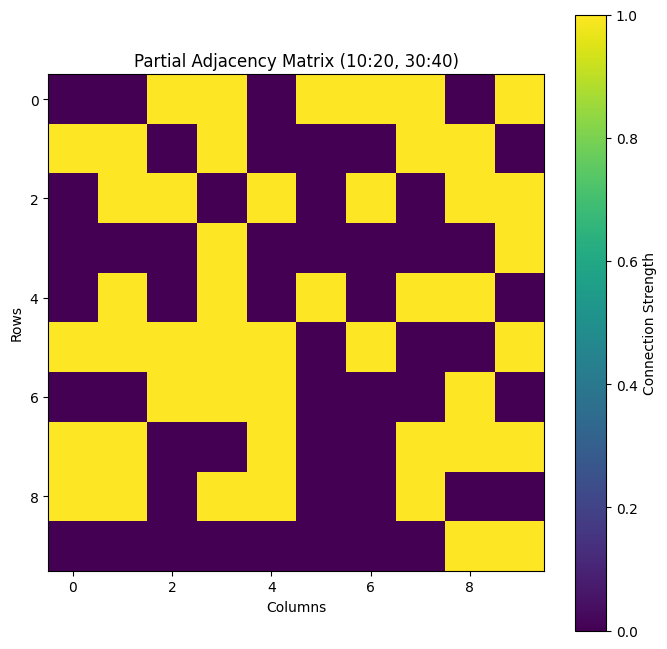

In [ ]:
import matplotlib.pyplot as plt

# Extract a partial matrix for visualization (e.g., rows 10-20, columns 30-40)
start_row, end_row, start_col, end_col = 10, 20, 30, 40
partial_A = A[start_row:end_row, start_col:end_col]

# Debugging: Print the partial matrix
print("Partial Adjacency Matrix:\n", partial_A)

# Check if the partial matrix is empty
if np.all(partial_A == 0):
    print("The selected partial adjacency matrix is empty or contains all zeros.")
else:
    # Plot the partial matrix
    plt.figure(figsize=(8, 8))
    plt.imshow(partial_A, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Connection Strength')
    plt.title(f"Partial Adjacency Matrix ({start_row}:{end_row}, {start_col}:{end_col})")
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()


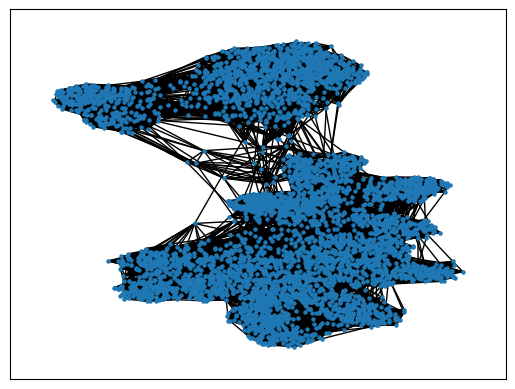

In [ ]:
# Plotting the Netwrok X graph, because we converted it from the KNN to Network X Graph. Netwrok X is another library like pandas for graph.
# Network G generates the Nondes and Edges from the adjacency matrix.
nx.draw_networkx(G, node_size = 5, with_labels = False)

Now that we have a Binary classification with our GCN, we have two distinguishable clusters because some of the people the people are classified as used stimulants (yes), some did not (No), some the nodes in between the two cluster. Means we can classify most of the pateint as yes/no

In [ ]:
!pip install --upgrade networkx

In [ ]:
print(hasattr(nx, "all_pairs_dijkstra_path_length"))


True


In [ ]:
!pip uninstall networkx
!pip install networkx


Found existing installation: networkx 3.4.2
Uninstalling networkx-3.4.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/networkx-3.4.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/networkx/*
Proceed (Y/n)? Y
  Successfully uninstalled networkx-3.4.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.7 MB/s eta 0:00:00


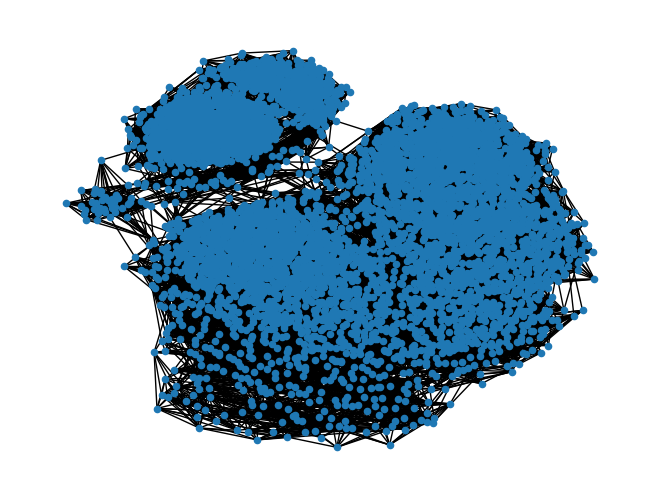

In [ ]:
nx.draw_kamada_kawai(G, node_size = 20, with_labels = False)

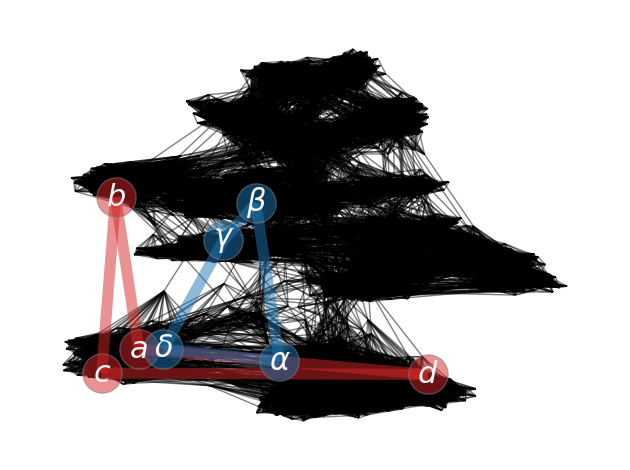

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# G = nx.cubical_graph()
pos = nx.spring_layout(G, seed=3113794652)  # positions for all nodes

# nodes
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.5}
nx.draw_networkx_nodes(G, pos, nodelist=[0, 1, 2, 3], node_color="tab:red", **options)
nx.draw_networkx_nodes(G, pos, nodelist=[4, 5, 6, 7], node_color="tab:blue", **options)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
    width=8,
    alpha=0.5,
    edge_color="tab:red",
)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
    width=8,
    alpha=0.5,
    edge_color="tab:blue",
)


# some math labels
labels = {}
labels[0] = r"$a$"
labels[1] = r"$b$"
labels[2] = r"$c$"
labels[3] = r"$d$"
labels[4] = r"$\alpha$"
labels[5] = r"$\beta$"
labels[6] = r"$\gamma$"
labels[7] = r"$\delta$"
nx.draw_networkx_labels(G, pos, labels, font_size=22, font_color="whitesmoke")

plt.tight_layout()
plt.axis("off")
plt.show()

In [ ]:
!pip install dash
!pip install visdcc
!pip install dash_core_components
!pip install dash_html_components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.8/518.8 kB 27.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdcc: filename=visdcc-0.0.50-py3-none-any.whl size=518238 sha256=ec12aae8cb045950d9074bb139134afe1d54551661f66a4a4a9dda3828f0baf7
  Stored in directory: /root/.cache/pip/wheels/0f/47/14/0c1bb282f77b43a1dacb5da14a61ee94edec34d74c1f1602f9
Successfully built visdcc


In [ ]:
pip install --ignore-installed blinker


In [ ]:
pip install --ignore-installed dash


  Using cached dash-2.18.2-py3-none-any.whl.metadata (10 kB)
  Using cached werkzeug-3.0.6-py3-none-any.whl.metadata (3.7 kB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached retrying-1.3.4-py3-none-any.whl.metadata (6.9 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached dash-2.18.2-py3-none-any.whl (7.8 MB)
Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)
Using cached dash_html_components-2.0.0-py3-none-any.whl (4.1 kB)
Using cached dash_table-5.0.0-py3-none-any.whl (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 78.9 MB/s eta 0:00:00
Using cached werkzeug-3.0.6-py3-none-any.whl (227 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.4 MB/s eta 0:

In [ ]:
# create a map that goes from edges and nodes to graph.
# Node just means row number form original dataset.
# Nodes is adding information to the nodes to graph them. Info such as shape, size
# Visdcc In Dash Graph
import dash
import visdcc
import pandas as pd
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State

# Create app (the interactive interface that you can click on and change color)
app = dash.Dash()

# Define the layout of the app, use Netwrok for the interaction with the network
# and RadioItems for the radio buttons Gree, Blue, Red. The Div is from div<> html tag
# for creating a box to throw in what you desire to build.
# Load the data ( the source code is pulling the node list from pandas, basically he is
# doing mopre steps to graph while we are using Netwrok X library which already
# stores nodes and the edges), that is why the node_list of mine is different that the
# source code).
# edges are lists [] containing tuples, each tuple () is a start node and finish node.
# the edges_list, the Netwrok X contains nodes_list = list(G.nodes)
edges = list(G.edges)
nodes_list = list(G.nodes)
nodes = [{'id': node_name, 'label': node_name, 'shape': 'dot', 'size': 12}
         for i, node_name in enumerate(nodes_list)]

app.layout = html.Div([
    visdcc.Network(id='net',
                   data={'nodes': nodes, 'edges': edges},
                   options={
                       'height': '600px',
                       'width': '100%',
                       'interaction': {'hover': True},  # Enable hover interaction
                       'physics': {
                           'enabled': True,
                           'forceAtlas2Based': {
                               'gravitationalConstant': -50,
                               'centralGravity': 0.01,
                               'springLength': 100,
                               'springConstant': 0.08
                           },
                           'maxVelocity': 50,
                           'solver': 'forceAtlas2Based',
                           'timestep': 0.35,
                           'stabilization': {'iterations': 150}
                       }
                   }),
    dcc.RadioItems(id='color',
                   options=[{'label': 'Red', 'value': '#FF4136'},
                            {'label': 'Green', 'value': '#2ECC40'},
                            {'label': 'Blue', 'value': '#0074D9'}],
                   value='#0074D9',
                   labelStyle={'display': 'inline-block', 'margin-right': '10px'})
])

# Define the callback to update node color
@app.callback(
    Output('net', 'options'),
    [Input('color', 'value')]
)
def update_color(selected_color):
    return {'nodes': {'color': selected_color}}

# Run the server
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-63-8074d11cbf88>:8: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-63-8074d11cbf88>:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>

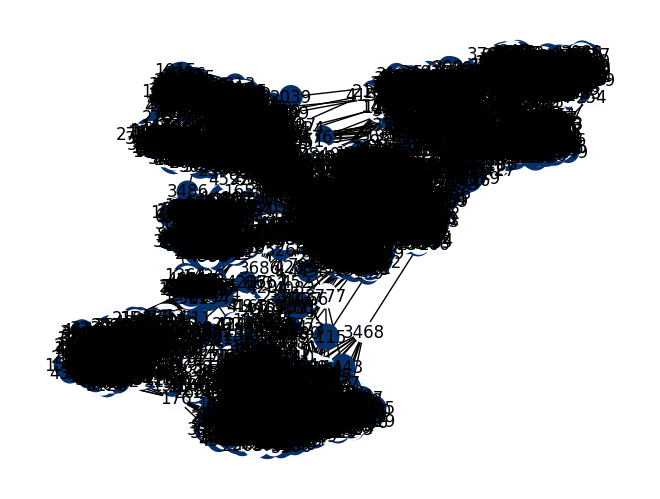

In [ ]:
# Add a custom attribute (e.g., 'group') to each node
import networkx as nx
import matplotlib.pyplot as plt
import random

for node in G.nodes():
    G.nodes[node]['group'] = random.choice(['A', 'B'])

# Draw the graph using a spring layout (force-directed layout)
pos = nx.spring_layout(G)

# Plot nodes with varying size and color based on 'group' attribute
node_size = [20 * G.degree[node] for node in G.nodes]
node_color = [1 if G.nodes[node]['group'] == 'A' else 0 for node in G.nodes]

nx.draw(G, pos, node_size=node_size, node_color=node_color, with_labels=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
import networkx as nx
import plotly.graph_objects as go

# Create a sample graph using NetworkX
G = nx.karate_club_graph()  # Use a sample graph, or define your own

# Define positions for all nodes
pos = nx.spring_layout(G)

# Create lists to hold the coordinates for edges
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])  # extend() adds elements to the list
    edge_y.extend([y0, y1, None])

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Create lists to hold the coordinates for nodes
node_x = []
node_y = []
node_text = []
node_color = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    # Color node points by the number of connections (degree)
    node_color.append(G.degree[node])
    node_text.append(f'Node {node}')

# Create node trace
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=node_text,
    mode='markers+text',
    textposition="bottom center",
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        color=node_color,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'),
        line_width=2)
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=0, l=0, r=0, t=40),
                annotations=[dict(
                    text="Interactive visualization",
                    showarrow=False,
                    xref="paper", yref="paper")],
                xaxis=dict(showgrid=False, zeroline=False),
                yaxis=dict(showgrid=False, zeroline=False))
             )

# Show the figure
fig.show()


In [ ]:
X_less_rows.shape

(5000, 1348)

In [ ]:
# Calculate num_features and num_classes
num_features = X_less_rows.shape[1]
num_classes = len(np.unique(y_less_rows))

print("Number of features:", num_features)
print("Number of classes:", num_classes)

Number of features: 1348
Number of classes: 2


In [ ]:
import numpy as np

# Convert to numpy
num_features = np.array([X.shape[1]])
num_classes = np.array([len(np.unique(y))])

print("Number of features:", num_features)
print("Number of classes:", num_classes)

Number of features: [1348]
Number of classes: [2]


**

The model provided is designed to work with weighted graphs. Here's how it handles edge weights:

1. Edge Weights in the Data Object:
In the from_networkx(G) function, the graph G is converted into a PyTorch Geometric data object.
If the edges in G have a 'weight' attribute, these weights are extracted and stored in data.edge_weight as a FloatTensor.
If the graph G does not contain edge weights, data.edge_weight is set to None.
2. Weighted Convolutional Layers:
The GCNConv layers in PyTorch Geometric accept an edge_weight parameter, which allows the GCN layers to perform weighted message passing.
In your GCN class, the forward method passes edge_weight to both convolutional layers (conv1 and conv2). If edge_weight is provided, the GCN layers will use these weights during the convolution operation.
3. Handling Missing Weights:
The forward method defaults edge_weight to None, ensuring that the model can still run even if no edge weights are provided.
Conclusion:
Yes, the model is weighted: When the graph G contains edge weights, these weights are used in the convolution operations of the GCN layers. This makes the model capable of leveraging edge weights, which can influence the message-passing process and ultimately the node representations.
Fallback for Unweighted Graphs: If no edge weights are provided, the model will behave like a standard GCN without edge weights.
This flexibility allows the model to adapt to both weighted and unweighted graph scenarios.
**

In [ ]:
# The discrepancy between the number of edges in edge_index (87,428) and the number of edge weights in edge_weight (43,714) indicates that the graph is undirected, but the edge_weight is only defined for half of the edges. This mismatch is causing the IndexError.
# Solution: Synchronize edge_weight with edge_index
# For undirected graphs, edge_index typically contains both directions for each edge (e.g., (u, v) and (v, u)), effectively doubling the number of entries. However, edge_weight seems to have been defined for only one direction of each edge. To fix this:
# since our edge_index is double of the edge_weight the graph is undirected so we have to double the edge_weight number
print(f"Number of edges in edge_index: {data.edge_index.shape[1]}")
if data.edge_weight is not None:
    print(f"Number of edge weights: {data.edge_weight.shape[0]}")

Number of edges in edge_index: 87450
Number of edge weights: 43725


In [ ]:
# Duplicate edge weights for both directions to Ensure edge weights are doubled for undirected graphs
if data.edge_weight is not None:
    data.edge_weight = torch.cat([data.edge_weight, data.edge_weight], dim=0)

In [ ]:
# # Add self-loops with default weight

# from torch_geometric.utils import add_self_loops

# data.edge_index, data.edge_weight = add_self_loops(
#     edge_index=data.edge_index,
#     edge_weight=data.edge_weight,
#     fill_value=1.0  # Default weight for self-loops
# )

In [ ]:
print(f"Number of edges in edge_index: {data.edge_index.shape[1]}")
if data.edge_weight is not None:
    print(f"Number of edge weights: {data.edge_weight.shape[0]}")

Number of edges in edge_index: 87450
Number of edge weights: 87450


Larger weights typically indicate stronger connections or higher importance between nodes. For example:
In a social network, an edge weight might represent the strength of a relationship (e.g., frequency of interactions).
In a knowledge graph, weights might reflect the confidence or importance of a relationship.

In [ ]:
# Weighted graphs and working with Explainer

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.utils import from_networkx
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Convert weight, X, y all to PyTorch tensors from numpy.
X_tensor = torch.FloatTensor(X_less_rows)  # Use FloatTensor for features
y_tensor = torch.LongTensor(y_less_rows)   # LongTensor for labels
edge_index = torch.LongTensor(from_networkx(G).edge_index)

# Split data into training and test sets
train_mask, test_mask = train_test_split(
    np.arange(len(y_less_rows)), test_size=0.2, random_state=42
)
train_mask = torch.tensor(train_mask, dtype=torch.long)
test_mask = torch.tensor(test_mask, dtype=torch.long)

# Create a PyTorch Geometric Data object
data = from_networkx(G)
data.x = X_tensor
data.y = y_tensor

# Adding edge weights if available, otherwise set edge_weight to None
if 'weight' in G.edges(data=True):
    data.edge_weight = torch.FloatTensor([d['weight'] for _, _, d in G.edges(data=True)])
else:
    data.edge_weight = None

# Step 3: Graph Convolutional Network (GCN)
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)  # First GCN layer
        self.conv2 = GCNConv(hidden_dim, output_dim)  # Second GCN layer

    def forward(self, x, edge_index, edge_weight):  # Default edge_weight to None
        x = self.conv1(x, edge_index, edge_weight)  # Apply first convolution with edge weights
        x = F.relu(x)  # Apply ReLU activation
        x = F.dropout(x, p=0.5, training=self.training)  # Apply dropout
        x = self.conv2(x, edge_index, edge_weight)  # Apply second convolution
        return F.log_softmax(x, dim=1)  # Apply log softmax for classification

# Define model, optimizer, and loss function
model = GCN(input_dim=X_tensor.shape[1], hidden_dim=16, output_dim=len(np.unique(y_less_rows)))
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Function to evaluate accuracy
def evaluate(mask):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_weight)
        _, predicted = torch.max(out[mask], 1)
        acc = accuracy_score(data.y[mask].numpy(), predicted.numpy())
    return acc

# Train the model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_weight)  # Ensure edge_weight is passed
    loss = criterion(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Training loop
train_acc_history = []
test_acc_history = []
loss_history = []
for epoch in range(1000):
    loss = train()
    train_acc = evaluate(train_mask)
    test_acc = evaluate(test_mask)
    train_acc_history.append(train_acc)
    test_acc_history.append(test_acc)
    loss_history.append(loss)
    print(f'Epoch {epoch}, Loss: {loss:.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')


Epoch 0, Loss: 1.0095, Train Accuracy: 0.0420, Test Accuracy: 0.0470
Epoch 1, Loss: 0.9664, Train Accuracy: 0.0430, Test Accuracy: 0.0470
Epoch 2, Loss: 0.9473, Train Accuracy: 0.0432, Test Accuracy: 0.0470
Epoch 3, Loss: 0.9227, Train Accuracy: 0.0437, Test Accuracy: 0.0490
Epoch 4, Loss: 0.8916, Train Accuracy: 0.0473, Test Accuracy: 0.0500
Epoch 5, Loss: 0.8656, Train Accuracy: 0.0590, Test Accuracy: 0.0710
Epoch 6, Loss: 0.8429, Train Accuracy: 0.0710, Test Accuracy: 0.0840
Epoch 7, Loss: 0.8189, Train Accuracy: 0.0950, Test Accuracy: 0.1130
Epoch 8, Loss: 0.7874, Train Accuracy: 0.1777, Test Accuracy: 0.1980
Epoch 9, Loss: 0.7554, Train Accuracy: 0.3252, Test Accuracy: 0.3260
Epoch 10, Loss: 0.7351, Train Accuracy: 0.4677, Test Accuracy: 0.4560
Epoch 11, Loss: 0.7105, Train Accuracy: 0.6075, Test Accuracy: 0.5860
Epoch 12, Loss: 0.6818, Train Accuracy: 0.7115, Test Accuracy: 0.6940
Epoch 13, Loss: 0.6608, Train Accuracy: 0.7963, Test Accuracy: 0.7810
Epoch 14, Loss: 0.6222, Train 

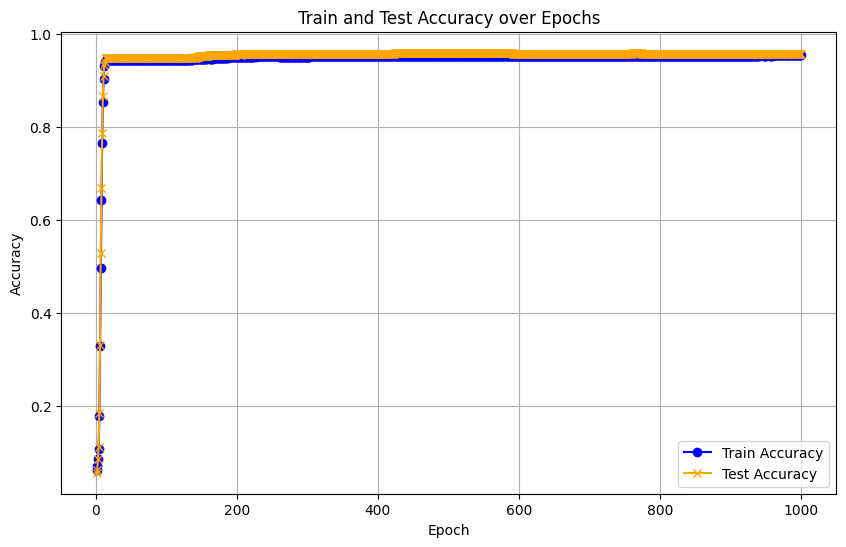

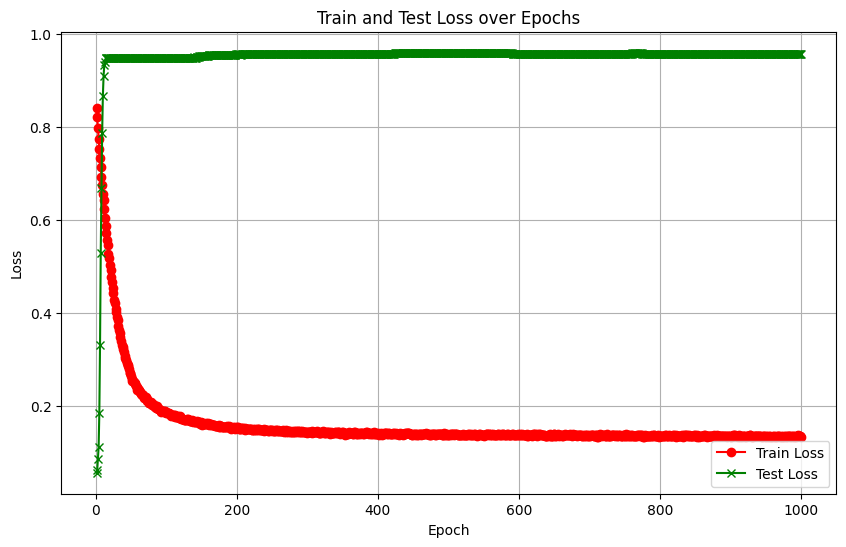

In [ ]:
import matplotlib.pyplot as plt

# Plotting train and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_acc_history) + 1), train_acc_history, label='Train Accuracy', color='blue', marker='o')
plt.plot(range(1, len(test_acc_history) + 1), test_acc_history, label='Test Accuracy', color='orange', marker='x')
plt.title('Train and Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Assuming train_loss_history and test_loss_history are defined
# If not, ensure the training loop computes and stores test loss in a variable
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_history) + 1), loss_history, label='Train Loss', color='red', marker='o')
plt.plot(range(1, len(test_acc_history) + 1), test_acc_history, label='Test Loss', color='green', marker='x')
plt.title('Train and Test Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Weighted graphs and working with Explainer

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.utils import from_networkx
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Convert weight, X, y all to PyTorch tensors from numpy.
X_tensor = torch.FloatTensor(X_less_rows)  # Use FloatTensor for features
y_tensor = torch.LongTensor(y_less_rows)   # LongTensor for labels
edge_index = torch.LongTensor(from_networkx(G).edge_index)

# Split data into training and test sets
train_mask, test_mask = train_test_split(
    np.arange(len(y_less_rows)), test_size=0.2, random_state=42
)
train_mask = torch.tensor(train_mask, dtype=torch.long)
test_mask = torch.tensor(test_mask, dtype=torch.long)

# Create a PyTorch Geometric Data object
data = from_networkx(G)
data.x = X_tensor
data.y = y_tensor

# Adding edge weights if available, otherwise set edge_weight to None
if 'weight' in G.edges(data=True):
    data.edge_weight = torch.FloatTensor([d['weight'] for _, _, d in G.edges(data=True)])
else:
    data.edge_weight = None

# Step 3: Graph Convolutional Network (GCN)
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index, edge_weight=None):
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(self.conv2(x, edge_index, edge_weight))
        x = self.conv3(x, edge_index, edge_weight)
        return F.log_softmax(x, dim=1)

# Define model, optimizer, and loss function
model = GCN(input_dim=X_tensor.shape[1], hidden_dim=16, output_dim=len(np.unique(y_less_rows)))
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)
criterion = nn.CrossEntropyLoss()

# Function to evaluate accuracy
def evaluate(mask):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_weight)
        _, predicted = torch.max(out[mask], 1)
        acc = accuracy_score(data.y[mask].numpy(), predicted.numpy())
    return acc

# Train the model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_weight)  # Ensure edge_weight is passed
    loss = criterion(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Training loop
train_acc_history = []
test_acc_history = []
loss_history = []
for epoch in range(1000):
    loss = train()
    train_acc = evaluate(train_mask)
    test_acc = evaluate(test_mask)
    train_acc_history.append(train_acc)
    test_acc_history.append(test_acc)
    loss_history.append(loss)
    print(f'Epoch {epoch}, Loss: {loss:.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')


Epoch 0, Loss: 0.7359, Train Accuracy: 0.2482, Test Accuracy: 0.2440
Epoch 1, Loss: 0.7282, Train Accuracy: 0.2647, Test Accuracy: 0.2670
Epoch 2, Loss: 0.7201, Train Accuracy: 0.2888, Test Accuracy: 0.2900
Epoch 3, Loss: 0.7157, Train Accuracy: 0.3230, Test Accuracy: 0.3220
Epoch 4, Loss: 0.7075, Train Accuracy: 0.3623, Test Accuracy: 0.3580
Epoch 5, Loss: 0.7019, Train Accuracy: 0.4037, Test Accuracy: 0.4030
Epoch 6, Loss: 0.7001, Train Accuracy: 0.4422, Test Accuracy: 0.4500
Epoch 7, Loss: 0.6900, Train Accuracy: 0.4773, Test Accuracy: 0.4890
Epoch 8, Loss: 0.6883, Train Accuracy: 0.5045, Test Accuracy: 0.5130
Epoch 9, Loss: 0.6815, Train Accuracy: 0.5417, Test Accuracy: 0.5500
Epoch 10, Loss: 0.6767, Train Accuracy: 0.5800, Test Accuracy: 0.5880
Epoch 11, Loss: 0.6720, Train Accuracy: 0.6400, Test Accuracy: 0.6500
Epoch 12, Loss: 0.6665, Train Accuracy: 0.6957, Test Accuracy: 0.6990
Epoch 13, Loss: 0.6623, Train Accuracy: 0.7500, Test Accuracy: 0.7550
Epoch 14, Loss: 0.6529, Train 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# K-Fold Cross Validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

train_accuracy_scores = []
test_accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(np.arange(len(y_less_rows)))):
    print(f"Fold {fold + 1}")

    # Update train and test masks for this fold
    train_mask = torch.tensor(train_index, dtype=torch.long)
    test_mask = torch.tensor(test_index, dtype=torch.long)

    # Reinitialize model, optimizer, and loss function for each fold
    model = GCN(input_dim=X_tensor.shape[1], hidden_dim=16, output_dim=len(np.unique(y_less_rows)))
    optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)

    # Training loop for this fold
    for epoch in range(100):  # Reduced to 100 epochs for demonstration purposes
        train()

    # Evaluate on the train and test sets for this fold
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_weight)

        # Train set predictions
        _, train_predicted = torch.max(out[train_mask], 1)
        train_true_labels = data.y[train_mask].numpy()
        train_predicted_labels = train_predicted.numpy()
        train_accuracy_scores.append(accuracy_score(train_true_labels, train_predicted_labels))

        # Test set predictions
        _, test_predicted = torch.max(out[test_mask], 1)
        test_true_labels = data.y[test_mask].numpy()
        test_predicted_labels = test_predicted.numpy()

    # Calculate metrics for the test set
    test_accuracy_scores.append(accuracy_score(test_true_labels, test_predicted_labels))
    precision_scores.append(precision_score(test_true_labels, test_predicted_labels, average='weighted', zero_division=0))
    recall_scores.append(recall_score(test_true_labels, test_predicted_labels, average='weighted', zero_division=0))
    f1_scores.append(f1_score(test_true_labels, test_predicted_labels, average='weighted', zero_division=0))

# Calculate mean and standard deviation of the scores
train_accuracy_mean, train_accuracy_std = np.mean(train_accuracy_scores), np.std(train_accuracy_scores)
test_accuracy_mean, test_accuracy_std = np.mean(test_accuracy_scores), np.std(test_accuracy_scores)
precision_mean, precision_std = np.mean(precision_scores), np.std(precision_scores)
recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

# Print the results
print("\n10-Fold Cross-Validation Results:")
print(f"Train Accuracy: Mean = {train_accuracy_mean:.4f}, Std = {train_accuracy_std:.4f}")
print(f"Test Accuracy: Mean = {test_accuracy_mean:.4f}, Std = {test_accuracy_std:.4f}")
print(f"Precision: Mean = {precision_mean:.4f}, Std = {precision_std:.4f}")
print(f"Recall: Mean = {recall_mean:.4f}, Std = {recall_std:.4f}")
print(f"F1 Score: Mean = {f1_mean:.4f}, Std = {f1_std:.4f}")


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10

10-Fold Cross-Validation Results:
Train Accuracy: Mean = 0.9550, Std = 0.0008
Test Accuracy: Mean = 0.9550, Std = 0.0068
Precision: Mean = 0.9121, Std = 0.0129
Recall: Mean = 0.9550, Std = 0.0068
F1 Score: Mean = 0.9330, Std = 0.0100


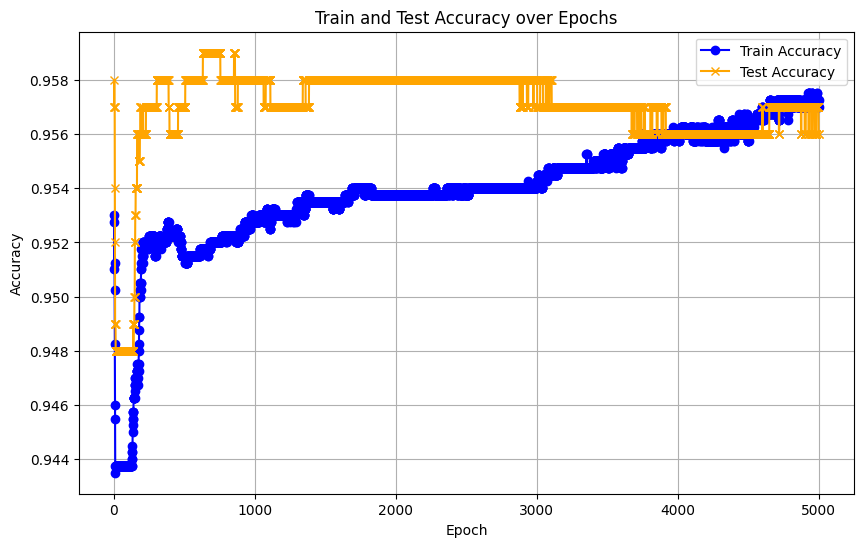

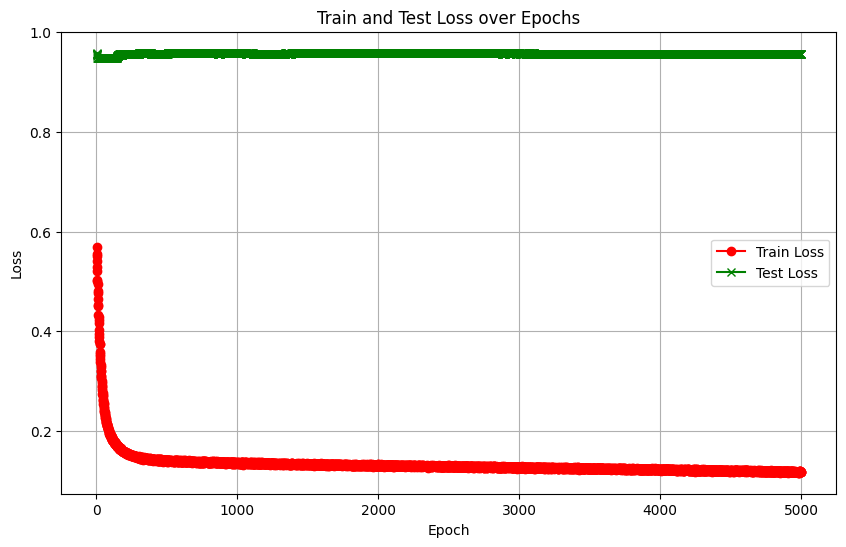

In [ ]:
import matplotlib.pyplot as plt

# Plotting train and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_acc_history) + 1), train_acc_history, label='Train Accuracy', color='blue', marker='o')
plt.plot(range(1, len(test_acc_history) + 1), test_acc_history, label='Test Accuracy', color='orange', marker='x')
plt.title('Train and Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Assuming train_loss_history and test_loss_history are defined
# If not, ensure the training loop computes and stores test loss in a variable
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_history) + 1), loss_history, label='Train Loss', color='red', marker='o')
plt.plot(range(1, len(test_acc_history) + 1), test_acc_history, label='Test Loss', color='green', marker='x')
plt.title('Train and Test Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


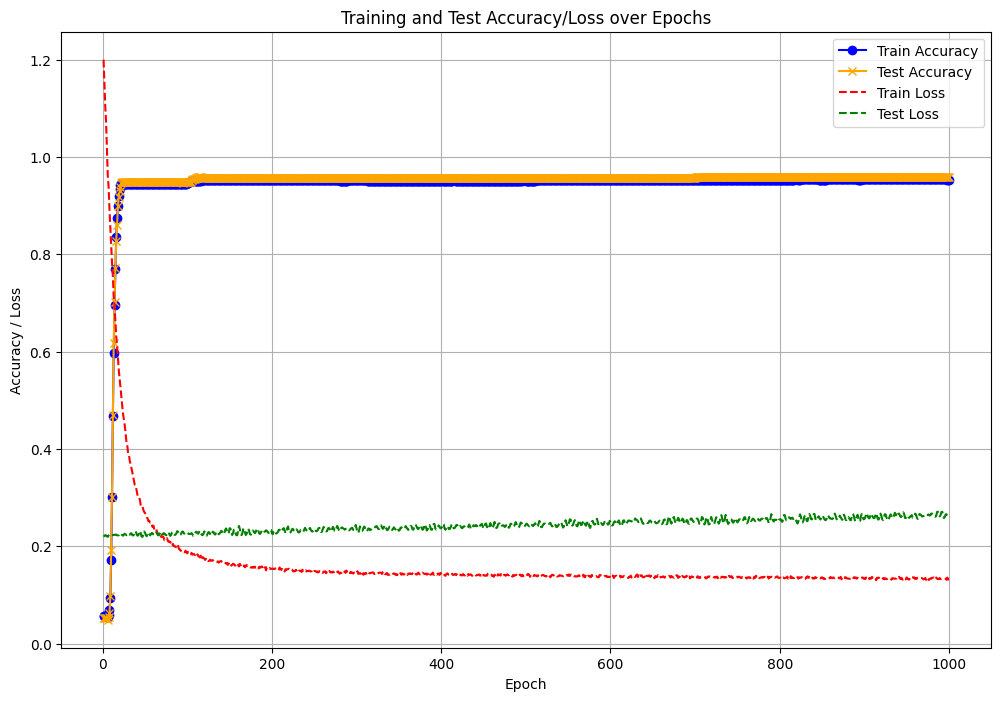

In [ ]:
# Combined plot for train/test accuracy and loss
plt.figure(figsize=(12, 8))

# Plot train and test accuracy
plt.plot(range(1, len(train_acc_history) + 1), train_acc_history, label='Train Accuracy', color='blue', marker='o')
plt.plot(range(1, len(test_acc_history) + 1), test_acc_history, label='Test Accuracy', color='orange', marker='x')

# Plot train and test loss
plt.plot(range(1, len(loss_history) + 1), loss_history, label='Train Loss', color='red', linestyle='--')
plt.plot(range(1, len(test_loss_history) + 1), test_loss_history, label='Test Loss', color='green', linestyle='--')

# Adding labels, title, and legend
plt.title('Training and Test Accuracy/Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Weighted graphs and working with Explainer

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

# Function to evaluate accuracy, precision, recall, and F1-score
def evaluate(mask):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_weight)
        _, predicted = torch.max(out[mask], 1)
        true_labels = data.y[mask].numpy()
        pred_labels = predicted.numpy()

        acc = accuracy_score(true_labels, pred_labels)
        precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
        recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
        f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)

    return acc, precision, recall, f1

folds = [10]  # Define 3, 5, and 10 folds

# Update the cross-validation loop to include these metrics
for k in folds:
    print(f"\nPerforming {k}-fold cross-validation...\n")
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_idx = 1

    for train_idx, test_idx in kf.split(np.arange(len(y_less_rows))):
        print(f"Fold {fold_idx}/{k}")

        # Create train/test masks
        train_mask = torch.tensor(train_idx, dtype=torch.long)
        test_mask = torch.tensor(test_idx, dtype=torch.long)

        # Reset model and optimizer for each fold
        model = GCN(input_dim=X_tensor.shape[1], hidden_dim=16, output_dim=len(np.unique(y_less_rows)))
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

        # Training loop
        for epoch in range(100):
            loss = train()

        # Evaluate model
        train_acc, train_precision, train_recall, train_f1 = evaluate(train_mask)
        test_acc, test_precision, test_recall, test_f1 = evaluate(test_mask)

        # Print metrics for this fold
        print(f"Fold {fold_idx} - Train Metrics: Accuracy={train_acc:.4f}, Precision={train_precision:.4f}, Recall={train_recall:.4f}, F1={train_f1:.4f}")
        print(f"Fold {fold_idx} - Test Metrics: Accuracy={test_acc:.4f}, Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1={test_f1:.4f}")

        fold_idx += 1




Performing 10-fold cross-validation...

Fold 1/10


NameError: name 'train' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import KFold
from torch_geometric.nn import GCNConv
import numpy as np





# Convert weight, X, y all to PyTorch tensors from numpy.
X_tensor = torch.FloatTensor(X_less_rows)  # Use FloatTensor for features
y_tensor = torch.LongTensor(y_less_rows)   # LongTensor for labels
edge_index = torch.LongTensor(from_networkx(G).edge_index)

# Split data into training and test sets
train_mask, test_mask = train_test_split(
    np.arange(len(y_less_rows)), test_size=0.2, random_state=42
)
train_mask = torch.tensor(train_mask, dtype=torch.long)
test_mask = torch.tensor(test_mask, dtype=torch.long)

# Create a PyTorch Geometric Data object
data = from_networkx(G)
data.x = X_tensor
data.y = y_tensor

# Adding edge weights if available, otherwise set edge_weight to None
if 'weight' in G.edges(data=True):
    data.edge_weight = torch.FloatTensor([d['weight'] for _, _, d in G.edges(data=True)])
else:
    data.edge_weight = None

# Step 3: Graph Convolutional Network (GCN)
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)  # First GCN layer
        self.conv2 = GCNConv(hidden_dim, output_dim)  # Second GCN layer

    def forward(self, x, edge_index, edge_weight):  # Default edge_weight to None
        x = self.conv1(x, edge_index, edge_weight)  # Apply first convolution with edge weights
        x = F.relu(x)  # Apply ReLU activation
        x = F.dropout(x, p=0.5, training=self.training)  # Apply dropout
        x = self.conv2(x, edge_index, edge_weight)  # Apply second convolution
        return F.log_softmax(x, dim=1)  # Apply log softmax for classification

# Define model, optimizer, and loss function
model = GCN(input_dim=X_tensor.shape[1], hidden_dim=16, output_dim=len(np.unique(y_less_rows)))
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()



# Function to evaluate accuracy, precision, recall, and F1-score
def evaluate(mask):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_weight)
        _, predicted = torch.max(out[mask], 1)
        true_labels = data.y[mask].numpy()
        pred_labels = predicted.numpy()

        acc = accuracy_score(true_labels, pred_labels)
        precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
        recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
        f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)

    return acc, precision, recall, f1

folds = [10]  # Define 3, 5, and 10 folds

# Perform cross-validation
for k in folds:
    print(f"\nPerforming {k}-fold cross-validation...\n")
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_idx = 1

    # Store metrics for all folds
    train_metrics = {"accuracy": [], "precision": [], "recall": [], "f1": []}
    test_metrics = {"accuracy": [], "precision": [], "recall": [], "f1": []}

    for train_idx, test_idx in kf.split(np.arange(len(y_less_rows))):
        print(f"Fold {fold_idx}/{k}")

        # Create train/test masks
        train_mask = torch.tensor(train_idx, dtype=torch.long)
        test_mask = torch.tensor(test_idx, dtype=torch.long)

        # Reset model and optimizer for each fold
        model = GCN(input_dim=X_tensor.shape[1], hidden_dim=16, output_dim=len(np.unique(y_less_rows)))
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

        # Function to evaluate accuracy
def evaluate(mask):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_weight)
        _, predicted = torch.max(out[mask], 1)
        acc = accuracy_score(data.y[mask].numpy(), predicted.numpy())
    return acc

# Train the model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_weight)  # Ensure edge_weight is passed
    loss = criterion(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Training loop
train_acc_history = []
test_acc_history = []
loss_history = []
for epoch in range(2000):
    loss = train()
    train_acc = evaluate(train_mask)
    test_acc = evaluate(test_mask)
    train_acc_history.append(train_acc)
    test_acc_history.append(test_acc)
    loss_history.append(loss)



# Evaluate model
train_acc, train_precision, train_recall, train_f1 = evaluate(train_mask)
test_acc, test_precision, test_recall, test_f1 = evaluate(test_mask)

# Store metrics
train_metrics["accuracy"].append(train_acc)
train_metrics["precision"].append(train_precision)
train_metrics["recall"].append(train_recall)
train_metrics["f1"].append(train_f1)

test_metrics["accuracy"].append(test_acc)
test_metrics["precision"].append(test_precision)
test_metrics["recall"].append(test_recall)
test_metrics["f1"].append(test_f1)

# Print metrics for this fold
print(f"Fold {fold_idx} - Train Metrics: Accuracy={train_acc:.4f}, Precision={train_precision:.4f}, Recall={train_recall:.4f}, F1={train_f1:.4f}")
print(f"Fold {fold_idx} - Test Metrics: Accuracy={test_acc:.4f}, Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1={test_f1:.4f}")
fold_idx += 1

# Calculate and display mean and std for metrics
print(f"\n{k}-Fold Cross-Validation Results (Train):")
for metric in train_metrics:
  mean_val = np.mean(train_metrics[metric])
  std_val = np.std(train_metrics[metric])
  print(f"{metric.capitalize()} - Mean: {mean_val:.4f}, Std: {std_val:.4f}")

  print(f"\n{k}-Fold Cross-Validation Results (Test):")
for metric in test_metrics:
  mean_val = np.mean(test_metrics[metric])
  std_val = np.std(test_metrics[metric])
  print(f"{metric.capitalize()} - Mean: {mean_val:.4f}, Std: {std_val:.4f}")



Performing 10-fold cross-validation...

Fold 1/10
Fold 1/10
Fold 1/10
Fold 1/10
Fold 1/10
Fold 1/10
Fold 1/10
Fold 1/10
Fold 1/10
Fold 1/10


TypeError: cannot unpack non-iterable float object

In [ ]:
print(f"X_tensor shape: {X_tensor.shape}")
print(f"y_tensor shape: {y_tensor.shape}")
print(f"weight shape: {weight.shape}")
print(f"edge_index shape: {data.edge_index.shape}")



X_tensor shape: torch.Size([5000, 1348])
y_tensor shape: torch.Size([5000])
weight shape: (59069,)
edge_index shape: torch.Size([2, 87826])




*   We are no longering running the rows of the data like the ML algorithms, we are running the nodes (features/columns) of the data. That's why we need to create this new class that records each nodes along with its edges, it is running the convolutions to figure out what is connecting diffenret nodes witheir correspondign edges. Although on the conventional KNN we can not perform feature importance ( KNN is just a cluster of their groups based on their distances Manhattan or Euclidean) in our GCN we can find hidden features by analyzing what causes the connection (edges) between specific nodes.
**bold text**

In [ ]:
print(X_tensor.shape)
print(y_tensor.shape)
print(weight.shape)
print(edge_index.shape)


torch.Size([5000, 1348])
torch.Size([5000])
(59069,)
torch.Size([2, 87826])


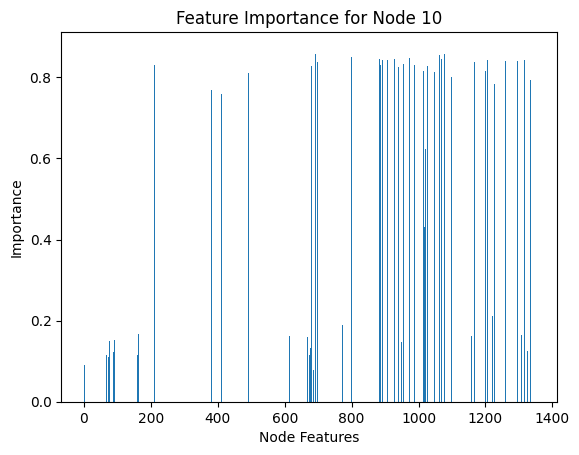

In [ ]:
# Visualize the importance of features for a specific node
node_idx = 10  # The node you explained
node_mask = explanation.node_mask[node_idx].detach().cpu().numpy()

# Plot the feature importance
plt.bar(range(len(node_mask)), node_mask)
plt.xlabel("Node Features")
plt.ylabel("Importance")
plt.title(f"Feature Importance for Node {node_idx}")
plt.show()


ModelConfig:

mode: Specifies the task type. For node classification with multiple classes, use 'multiclass_classification'.
task_level: Indicates the prediction task's scope. Use 'node' for node-level predictions.
return_type: Matches your model's output (e.g., 'log_probs' if the model outputs log probabilities).
Explainer:

model_config is now included to inform the explainer about the model's task and output type. **bold text**

In [ ]:
from torch_geometric.explain import Explainer
from torch_geometric.explain.algorithm import GNNExplainer

# Define the explainer
explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=200),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='multiclass_classification',
        task_level='node',
        return_type='log_probs',
    ),
)

# Specify the node to explain
node_index = 10

# Generate explanation, including edge_weight
explanation = explainer(
    x=data.x,
    edge_index=data.edge_index,
    edge_weight=data.edge_weight,  # Pass edge weights explicitly
    index=node_index
)
print(f'Generated explanations in {explanation.available_explanations}')

# Visualize feature importance
path = 'feature_importance.png'
explanation.visualize_feature_importance(
    path=path,
    top_k=20,
    feat_labels=df_selected.drop(columns=['stmnmflag', 'ANALWT2_C']).columns
)
print(f"Feature importance plot has been saved to '{path}'")

# Visualize the subgraph
path = 'subgraph.pdf'
explanation.visualize_graph(path)
print(f"Subgraph visualization plot has been saved to '{path}'")


Generated explanations in ['edge_mask', 'node_mask']
Feature importance plot has been saved to 'feature_importance.png'
Subgraph visualization plot has been saved to 'subgraph.pdf'


In [ ]:
output = model(data.x, data.edge_index, data.edge_weight)
print(output.shape)  # Should be [num_nodes, 2] (raw logits)

# The output shape of torch.Size([5000, 2]) indicates that your model is returning raw logits for 5000 nodes and 2 classes. For binary classification with raw logits, you need to adjust the Explainer configuration accordingly.

torch.Size([5000, 2])


** To add Node Weight instead of edge wieght we need to create a bidrectional graph. the weight of the nodes are the weight of the edge that is poiting in the direction of the node.**

**First loaded the library to do MICE imputing to generate values for all missing variables because KNN graph does not work with missing values and we have many of them. We then transformed the data into imputed values and then scaled it so the feature with large scaling don't influence the data. Then we run a KNN algorithms with 5 neighbors and used it to create a graph with the adjacency matrix. Next, we use the graph to fit a graph convolutional network and use it to generate predictions for our outcome variable.**

In [ ]:
# data.edge_index
# used this code to see how the data looks prior to fixing the error.

In [ ]:
# Training loop to calculate and store training/test loss and accuracy
train_loss_history = []
test_loss_history = []
train_acc_history = []
test_acc_history = []

for epoch in range(1000):  # Replace with the desired number of epochs
    # Train step
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_weight)
    train_loss = criterion(out[train_mask], data.y[train_mask])
    train_loss.backward()
    optimizer.step()

    # Evaluate training and test metrics
    model.eval()
    with torch.no_grad():
        # Training metrics
        train_out = model(data.x, data.edge_index, data.edge_weight)
        train_loss = criterion(train_out[train_mask], data.y[train_mask]).item()
        _, train_pred = torch.max(train_out[train_mask], 1)
        train_acc = accuracy_score(data.y[train_mask].numpy(), train_pred.numpy())

        # Test metrics
        test_loss = criterion(train_out[test_mask], data.y[test_mask]).item()
        _, test_pred = torch.max(train_out[test_mask], 1)
        test_acc = accuracy_score(data.y[test_mask].numpy(), test_pred.numpy())

    # Append metrics to history
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    train_acc_history.append(train_acc)
    test_acc_history.append(test_acc)

    # Print metrics for the epoch
    print(f"Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")


Epoch 1: Train Loss: 0.0688, Train Acc: 0.9728, Test Loss: 0.2198, Test Acc: 0.9530
Epoch 2: Train Loss: 0.0689, Train Acc: 0.9725, Test Loss: 0.2214, Test Acc: 0.9520
Epoch 3: Train Loss: 0.0691, Train Acc: 0.9705, Test Loss: 0.2228, Test Acc: 0.9510
Epoch 4: Train Loss: 0.0689, Train Acc: 0.9718, Test Loss: 0.2222, Test Acc: 0.9510
Epoch 5: Train Loss: 0.0687, Train Acc: 0.9722, Test Loss: 0.2206, Test Acc: 0.9530
Epoch 6: Train Loss: 0.0688, Train Acc: 0.9730, Test Loss: 0.2194, Test Acc: 0.9540
Epoch 7: Train Loss: 0.0688, Train Acc: 0.9722, Test Loss: 0.2221, Test Acc: 0.9530
Epoch 8: Train Loss: 0.0692, Train Acc: 0.9708, Test Loss: 0.2239, Test Acc: 0.9510
Epoch 9: Train Loss: 0.0688, Train Acc: 0.9725, Test Loss: 0.2221, Test Acc: 0.9520
Epoch 10: Train Loss: 0.0688, Train Acc: 0.9722, Test Loss: 0.2221, Test Acc: 0.9520
Epoch 11: Train Loss: 0.0688, Train Acc: 0.9722, Test Loss: 0.2220, Test Acc: 0.9530
Epoch 12: Train Loss: 0.0689, Train Acc: 0.9718, Test Loss: 0.2231, Test A

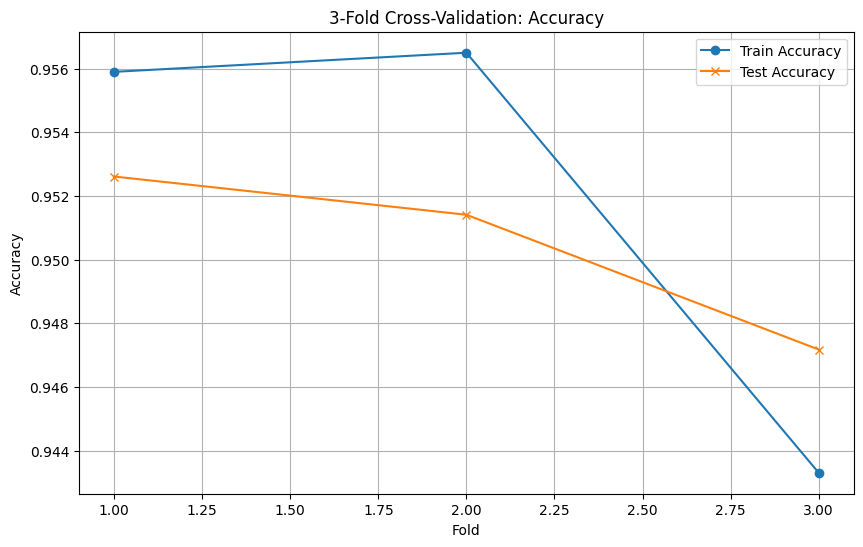

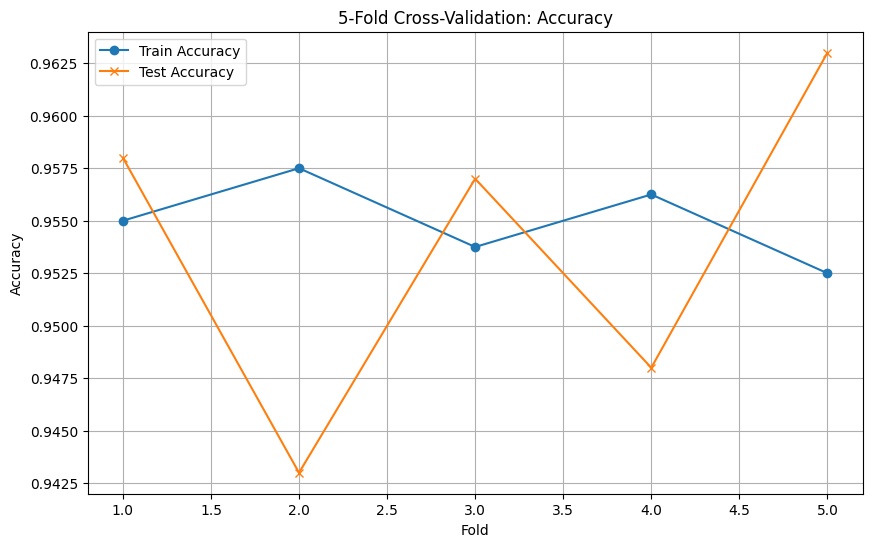

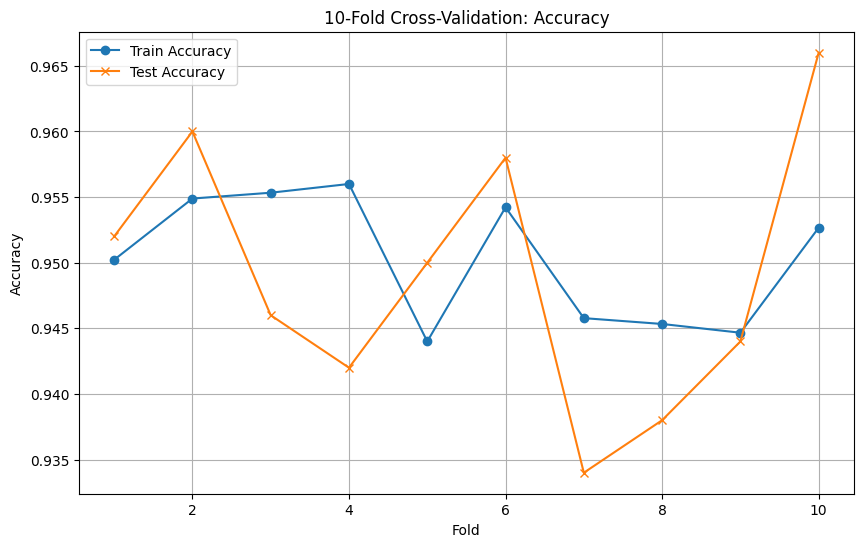

In [ ]:
# Plot results for each fold setting
for k in cv_results:
    train_accuracies = cv_results[k]["train_acc"]
    test_accuracies = cv_results[k]["test_acc"]

    # Plot train and test accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracy', marker='x')
    plt.title(f'{k}-Fold Cross-Validation: Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


# How to incorportate weighted graph:

We use a calibrated weighted variable provided in the codebook. ANALWT2_C is the variable and we made sure to drop it from the X list because it should only be utilized as the weighted variable and not a predictor variable.

Train-Test Split: The data is split into training and test sets using train_test_split.
Masks: Created train_mask and test_mask to index training and test samples.
Evaluate Function: A new function evaluate(mask) calculates accuracy for the specified dataset (training or test).
Accuracy Tracking: During each epoch, the training and test accuracies are calculated and logged.